## Load modules

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
sys.path.insert(1, '../../../') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
u.check_virtual_memory()

3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 107 GB / percent used: 14.7 %


## Load model data

In [2]:
# Define period
period = slice('1981','2014')

# Define zone
latlim=(10,50)
lonlim=(60,110)

# Load first member

In [15]:
institute = 'IPSL'
model = 'IPSL-CM6A-LR'
realization = 'r1i1p1f1'
var = 'tas'
if var in ['tas', 'pr']:
    table = 'Amon'

In [5]:
# Load historical
da_historical = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/historical/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords'
).sel(time=period)[var]

# Load amip
da_amip = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/amip/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords'
).sel(time=period)[var]

# Load land-hist
da_land_hist = xr.open_mfdataset(
    '/bdd/CMIP6/LS3MIP/'+institute+'/'+model+'/land-hist/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords'
).sel(time=period)[var]

# Load HighResMIP
da_HR = xr.open_mfdataset(
    '/bdd/CMIP6/HighResMIP/'+institute+'/IPSL-CM6A-ATM-HR/highresSST-present/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords'
).sel(time=period)[var]

# Create ensemble mean

In [56]:
institute = 'IPSL'
model = 'IPSL-CM6A-LR'
var = 'tas'
if var in ['tas', 'pr']:
    table = 'Amon'

## da_historical

In [17]:
realization = '*'
da_historical = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/historical/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', 
    combine='nested', concat_dim='realization', parallel=True
).sel(time=period)[var]

da_historical

In [23]:
ens = da_historical.mean('realization', keep_attrs=True)
ens.attrs['realization'] = da_historical.realization.size
ens

<xarray.DataArray 'tas' (time: 408, lat: 143, lon: 144)>
dask.array<mean_agg-aggregate, shape=(408, 143, 144), dtype=float32, chunksize=(408, 143, 144), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * time     (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       air_temperature
    long_name:           Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella
    realization:         32

In [24]:
root_path='/data/mlalande/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/ens/Amon/tas/gr/latest'
ens.to_netcdf(root_path+'/tas_Amon_IPSL-CM6A-LR_historical_ens_gr_198101-201412.nc')

## da_amip

In [48]:
realization = '*'
da_amip = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/amip/'+realization+'/'+table+'/'+var+'/gr/latest/*-201412.nc', 
    combine='nested', concat_dim='realization', parallel=True
).sel(time=period)[var]
da_amip

<xarray.DataArray 'tas' (realization: 21, time: 408, lat: 143, lon: 144)>
dask.array<getitem, shape=(21, 408, 143, 144), dtype=float32, chunksize=(1, 408, 143, 144), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * time     (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: realization
Attributes:
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       air_temperature
    description:         Near-Surface Air Temperature
    long_name:           Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella

In [50]:
ens = da_amip.mean('realization', keep_attrs=True)
ens.attrs['realization'] = da_amip.realization.size
ens

<xarray.DataArray 'tas' (time: 408, lat: 143, lon: 144)>
dask.array<mean_agg-aggregate, shape=(408, 143, 144), dtype=float32, chunksize=(408, 143, 144), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * time     (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Attributes:
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       air_temperature
    description:         Near-Surface Air Temperature
    long_name:           Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella
    realization:         21

In [52]:
root_path='/data/mlalande/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/amip/ens/Amon/tas/gr/latest'
ens.to_netcdf(root_path+'/tas_Amon_IPSL-CM6A-LR_amip_ens_gr_198101-201412.nc')

# Load ensemble mean

In [3]:
institute = 'IPSL'
model = 'IPSL-CM6A-LR'
realization = 'ens'
var = 'tas'
if var in ['tas', 'pr']:
    table = 'Amon'

In [4]:
# Load historical ens
experiment='historical'
da_historical = xr.open_dataarray(
    '/data/mlalande/bdd/CMIP6/CMIP/'+institute+'/'+model+'/'+experiment+'/'+realization+'/'+table+'/'+var+'/gr/latest/'+\
    var+'_'+table+'_'+model+'_'+experiment+'_'+realization+'_gr_198101-201412.nc'
)

# Load amip ens
experiment='amip'
da_amip = xr.open_dataarray(
    '/data/mlalande/bdd/CMIP6/CMIP/'+institute+'/'+model+'/'+experiment+'/'+realization+'/'+table+'/'+var+'/gr/latest/'+\
    var+'_'+table+'_'+model+'_'+experiment+'_'+realization+'_gr_198101-201412.nc'
)

# No ensembles for land-hist and HR
realization = 'r1i1p1f1'

# Load land-hist
da_land_hist = xr.open_mfdataset(
    '/bdd/CMIP6/LS3MIP/'+institute+'/'+model+'/land-hist/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords'
).sel(time=period)[var]

# Load HighResMIP
da_HR = xr.open_mfdataset(
    '/bdd/CMIP6/HighResMIP/'+institute+'/IPSL-CM6A-ATM-HR/highresSST-present/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', combine='by_coords'
).sel(time=period)[var]

## Load obs 
Attention en °C

In [5]:
obs = xr.open_mfdataset(
    '/bdd/cru/cru_ts_4.00/data/tmp/cru_ts4.00.*.tmp.dat.nc', combine='nested', concat_dim='time'
).isel(
    time=slice(1080,1488)
).tmp
obs

<xarray.DataArray 'tmp' (time: 408, lat: 360, lon: 720)>
dask.array<getitem, shape=(408, 360, 720), dtype=float32, chunksize=(408, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * time     (time) datetime64[ns] 1981-01-16 1981-02-15 ... 2014-12-16
Attributes:
    long_name:                   near-surface temperature
    units:                       degrees Celsius
    correlation_decay_distance:  1200.0

In [7]:
stn = xr.open_mfdataset(
    '/bdd/cru/cru_ts_4.00/data/tmp/cru_ts4.00.*.tmp.dat.nc', combine='nested', concat_dim='time'
).isel(
    time=slice(1080,1488)
).stn
stn

<xarray.DataArray 'stn' (time: 408, lat: 360, lon: 720)>
dask.array<getitem, shape=(408, 360, 720), dtype=int32, chunksize=(408, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 1981-01-16 1981-02-15 ... 2014-12-16
Attributes:
    description:  number of stations contributing to each datum

### Regrid using xESMF (https://xesmf.readthedocs.io/en/latest/) 
obs + HR

In [6]:
# Make the regrider
regridder_obs = xe.Regridder(obs, da_historical, 'bilinear', periodic=True)
regridder_obs

Overwrite existing file: bilinear_360x720_143x144_peri.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_360x720_143x144_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (360, 720) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      True

In [7]:
# Regrid the data
obs_regrid = regridder_obs(obs)

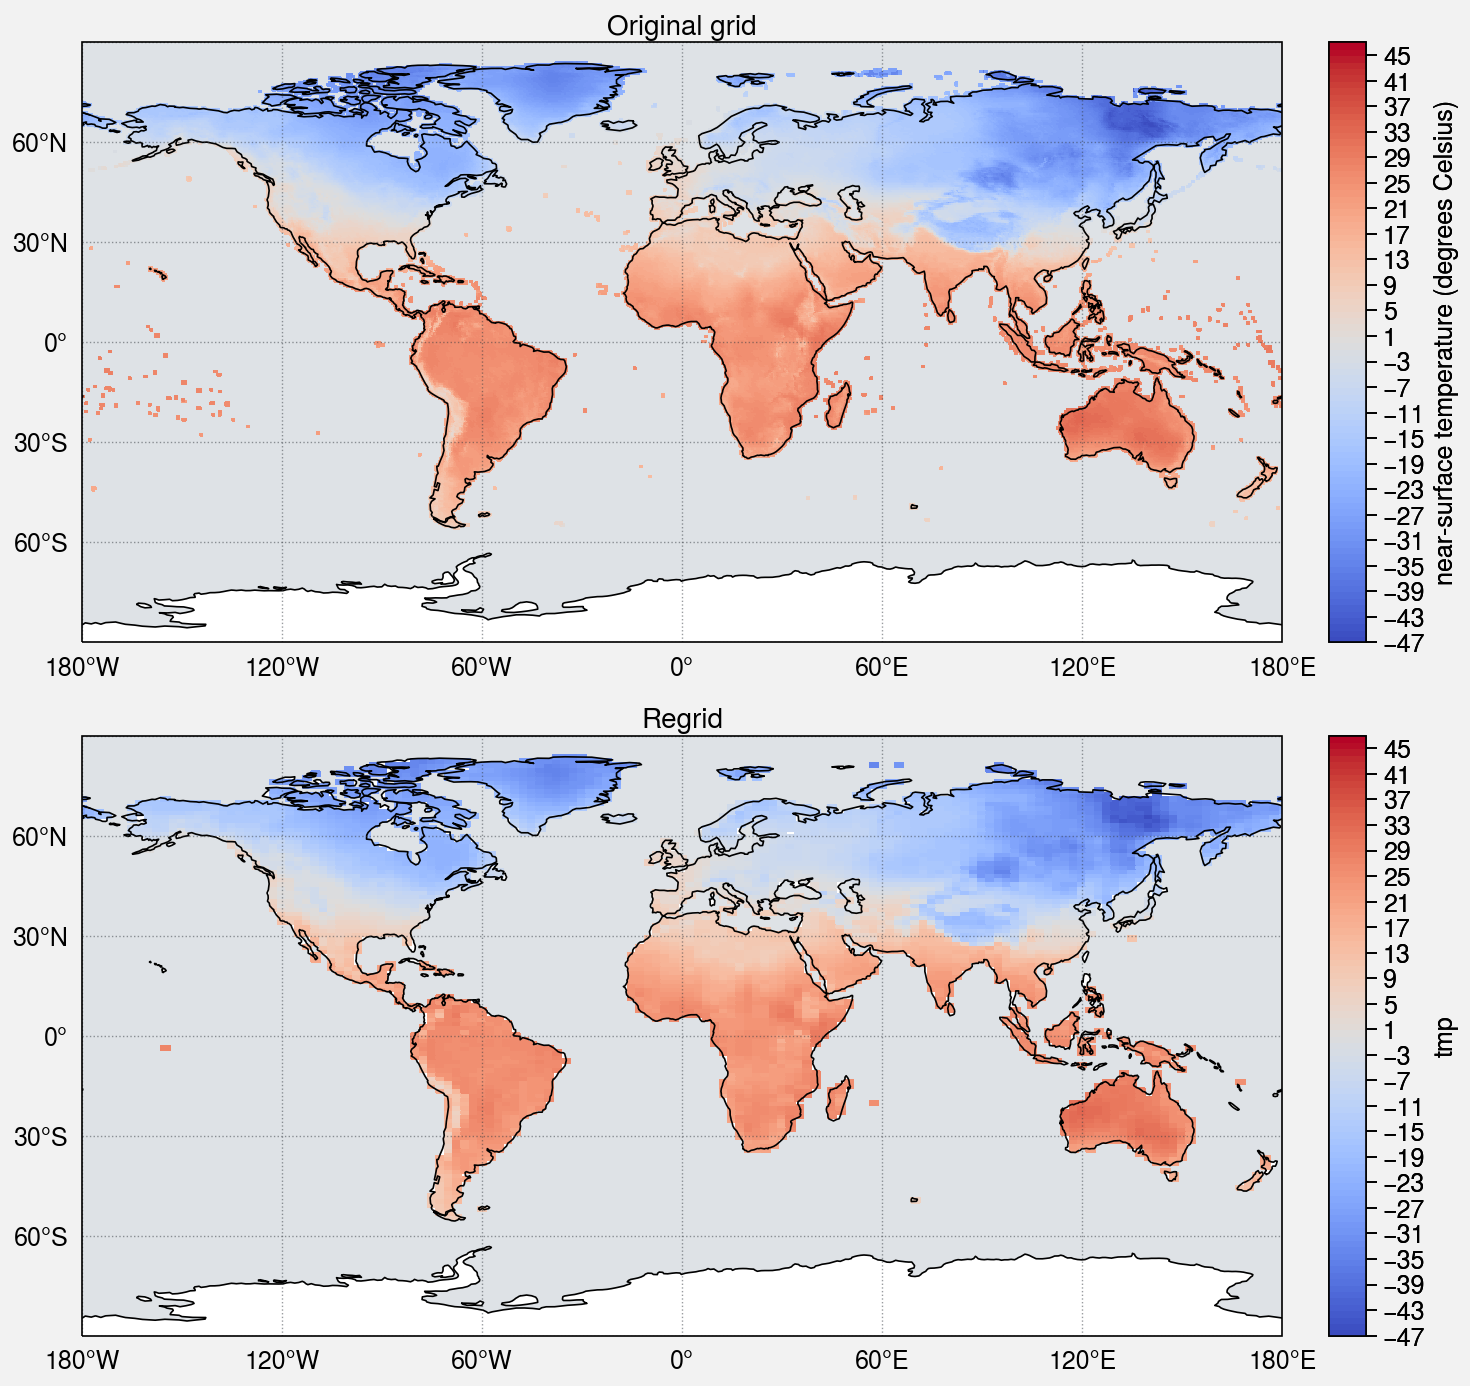

In [13]:
f, axs = plot.subplots(proj='cyl', ncols=1, nrows=2, axwidth=6)

axs[0].pcolormesh(obs[0], colorbar='r', cmap='CoolWarm', levels=100, symmetric='True')
axs[0].format(title='Original grid')

axs[1].pcolormesh(obs_regrid[0], colorbar='r', cmap='CoolWarm', levels=100, symmetric='True')
axs[1].format(title='Regrid')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=False,
    lonlines=60, latlines=30
)

In [8]:
# Regrid HighResMIP
regridder_HR = xe.Regridder(da_HR, da_historical, 'bilinear', periodic=True)
regridder_HR

Overwrite existing file: bilinear_361x512_143x144_peri.nc 
 You can set reuse_weights=True to save computing time.


xESMF Regridder 
Regridding algorithm:       bilinear 
Weight filename:            bilinear_361x512_143x144_peri.nc 
Reuse pre-computed weights? False 
Input grid shape:           (361, 512) 
Output grid shape:          (143, 144) 
Output grid dimension name: ('lat', 'lon') 
Periodic in longitude?      True

In [9]:
# Regrid the data
da_HR_regrid = regridder_HR(da_HR)

# Check stations

In [69]:
stn0 = stn.where(stn>=0)

In [73]:
stn

<xarray.DataArray 'stn' (time: 408, lat: 360, lon: 720)>
dask.array<getitem, shape=(408, 360, 720), dtype=int32, chunksize=(408, 360, 720), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon      (lon) float32 -179.75 -179.25 -178.75 ... 178.75 179.25 179.75
  * time     (time) datetime64[ns] 1981-01-16 1981-02-15 ... 2014-12-16
Attributes:
    description:  number of stations contributing to each datum

In [75]:
stn_mean = stn0.mean('time').sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1]))
stn_mean.load()

/home/mlalande/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/home/mlalande/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'stn' (lat: 80, lon: 100)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,  8., nan, nan],
       ...,
       [ 8.,  8.,  8., ...,  8.,  8.,  8.],
       [ 8.,  8.,  8., ...,  8.,  8.,  8.],
       [ 8.,  8.,  8., ...,  8.,  8.,  8.]])
Coordinates:
  * lat      (lat) float32 10.25 10.75 11.25 11.75 ... 48.25 48.75 49.25 49.75
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 108.75 109.25 109.75

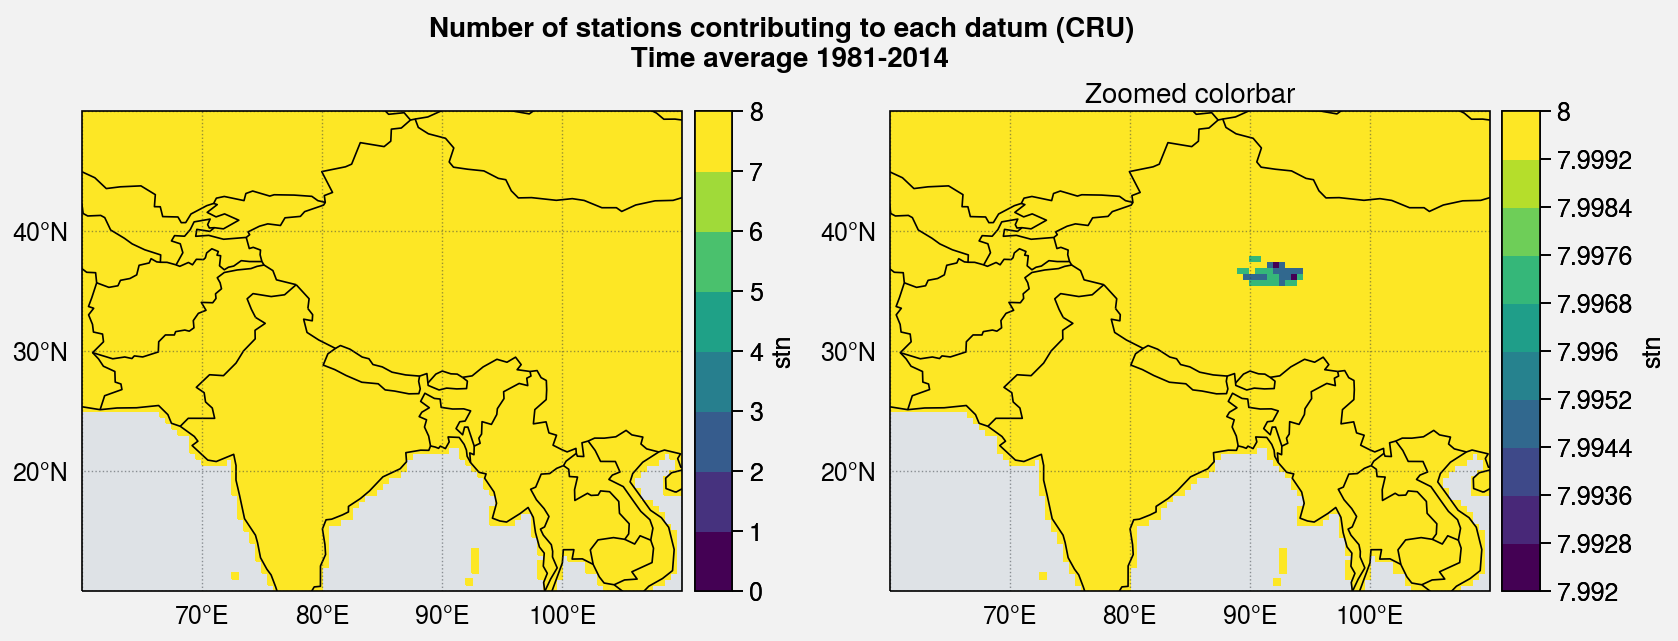

In [81]:
latlim=(10,50)
lonlim=(60,110)

f, axs = plot.subplots(proj='cyl', axwidth=3, ncols=2)

axs[0].pcolormesh(stn_mean, cmap='viridis', colorbar='r', levels=plot.arange(0,8,1))
axs[0].format(title='')

axs[1].pcolormesh(stn_mean, cmap='viridis', colorbar='r')
axs[1].format(title='Zoomed colorbar')


axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    lonlines=10, latlines=10, abc=False, latlim=latlim, lonlim=lonlim,
    suptitle='Number of stations contributing to each datum (CRU) \n Time average 1981-2014'
)

f.save('img/temp/stn_CRU.png')

# Check monthly data

In [35]:
latlim=(10,50)
lonlim=(60,110)

obs_mon = obs.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).groupby('time.month').mean('time')
obs_mon.load()

/home/mlalande/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


<xarray.DataArray 'tmp' (month: 12, lat: 80, lon: 100)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  24.308825 ,
                 nan,         nan],
        ...,
        [-13.241174 , -13.52059  , -13.632353 , ..., -25.570591 ,
         -25.752937 , -24.961771 ],
        [-13.835294 , -14.176473 , -14.291176 , ..., -24.473532 ,
         -25.032358 , -25.341175 ],
        [-14.094118 , -14.47353  , -14.591177 , ..., -25.067646 ,
         -24.95882  , -25.570583 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  24.794117 ,
                 nan,         nan],
        ...,
        [-13.082353 , -13.285295 , -13.291177 , ..., -21.464706 ,
         -21.62059  , -20.741177 ],
        [-13.602942 , -13.920588 , -14.038235 , ..., -20.099998 ,
         -20.564707 , -21.058823 ],
        [-13.841176 , -14.170588 , -14.385294 , ..., -20.65294  ,
         -20.45     , -21.152939 ]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  25.735296 ,
                 nan,         nan],
        ...,
        [ -5.220588 ,  -5.2999997,  -5.2676473, ..., -12.438237 ,
         -12.632353 , -11.5      ],
        [ -5.8382363,  -6.1176467,  -6.0794115, ..., -10.682352 ,
         -11.37647  , -11.985294 ],
        [ -6.1705875,  -6.482354 ,  -6.526471 , ..., -11.338234 ,
         -11.188233 , -12.17647  ]],

       ...,

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  26.194118 ,
                 nan,         nan],
        ...,
        [  7.0352955,   7.1705875,   7.4088235, ...,  -2.7264705,
          -2.8882353,  -1.9205881],
        [  6.591177 ,   6.6058826,   6.7323523, ...,  -1.1676471,
          -1.8617648,  -2.3852942],
        [  6.3117642,   6.2264705,   6.3588233, ...,  -1.8088236,
          -1.7117647,  -2.5294118]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  25.71765  ,
                 nan,         nan],
        ...,
        [ -2.5911765,  -2.4205883,  -2.3058825, ..., -14.79412  ,
         -15.079412 , -14.194118 ],
        [ -3.0676472,  -3.117647 ,  -3.1029413, ..., -13.188237 ,
         -13.914707 , -14.423531 ],
        [ -3.4382353,  -3.5970588,  -3.5882354, ..., -13.702942 ,
         -13.664706 , -14.4441185]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,  24.926468 ,
                 nan,         nan],
        ...,
        [-10.285294 , -10.400001 , -10.388237 , ..., -22.47647  ,
         -22.658827 , -21.891174 ],
        [-10.829412 , -11.064706 , -11.141177 , ..., -21.164705 ,
         -21.749998 , -22.179413 ],
        [-11.282353 , -11.505882 , -11.605883 , ..., -21.67059  ,
         -21.608824 , -22.214706 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 60.25 60.75 61.25 61.75 ... 108.75 109.25 109.75
  * lat      (lat) float32 10.25 10.75 11.25 11.75 ... 48.25 48.7

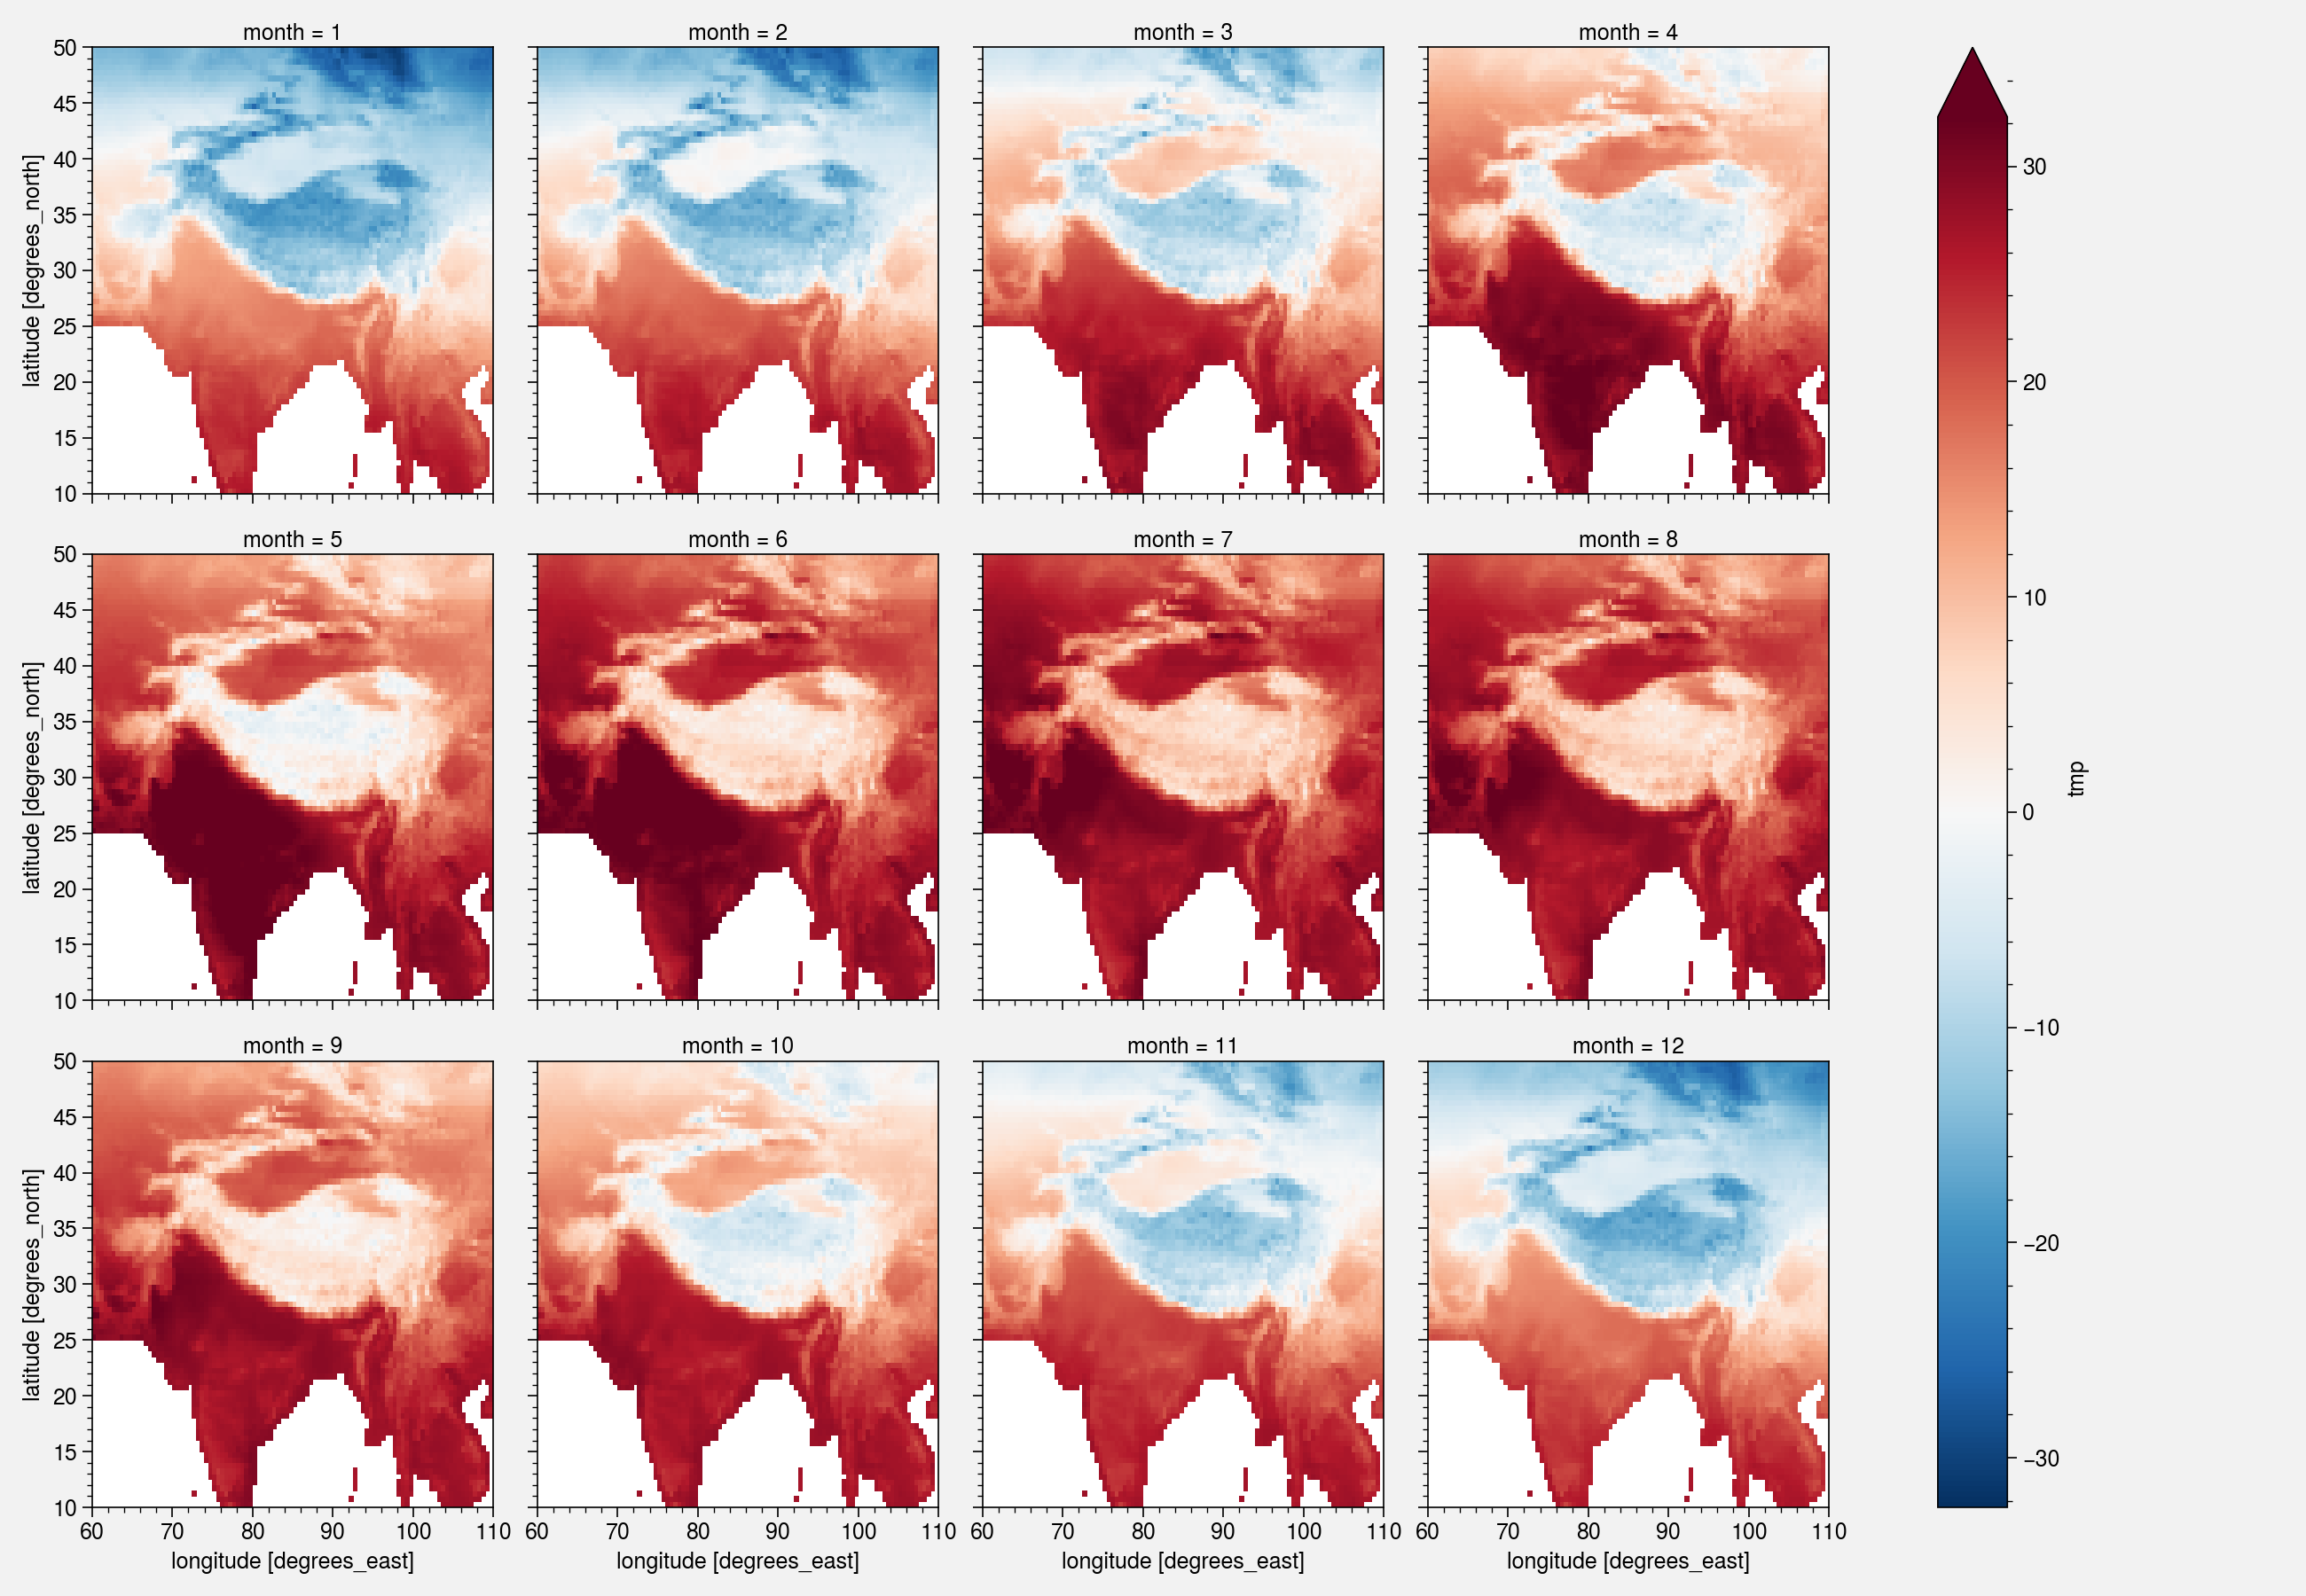

In [36]:
obs_mon.plot(col='month', col_wrap=4, robust=True)

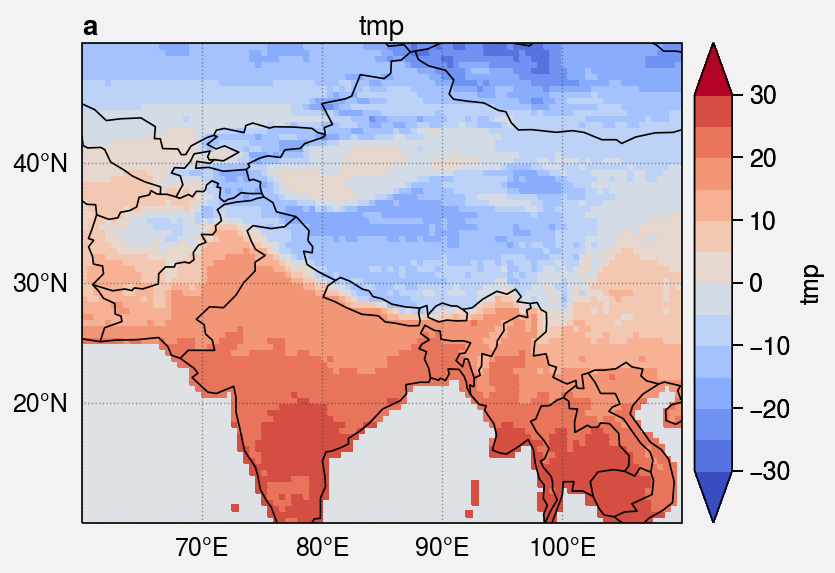

In [87]:
# Check colorbars extent

f, axs = plot.subplots(proj='cyl', axwidth=3)

axs.pcolormesh(
    obs_mon.isel(month=1), 
    cmap='CoolWarm',  
    colorbar='r',
#         norm='midpoint',
    levels=plot.arange(-30,30,5),
    extend='both'
)

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

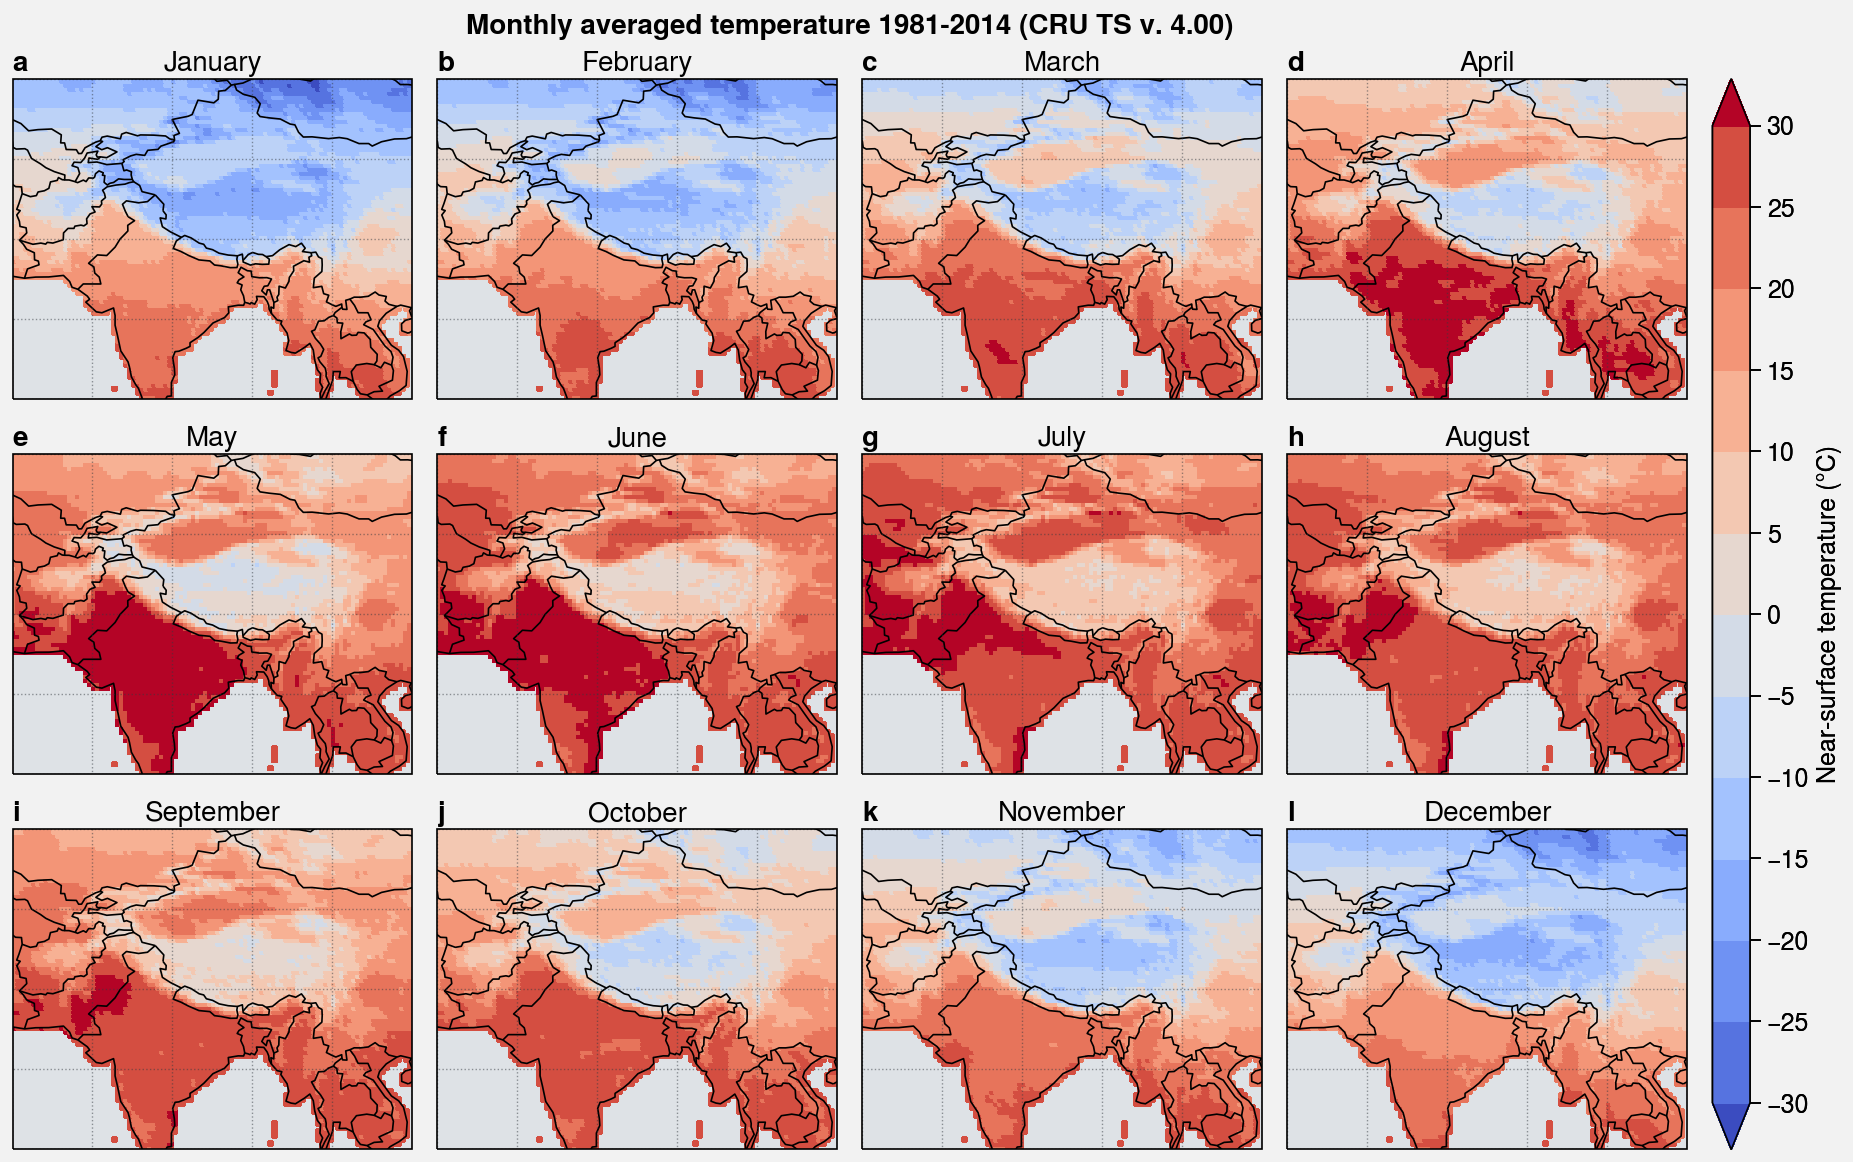

In [38]:
import calendar

f, axs = plot.subplots(proj='cyl', ncols=4, nrows=3, share=3, axwidth=2)

for i, ax in enumerate(axs):
    m = ax.pcolormesh(
        obs_mon.isel(month=i), 
        cmap='CoolWarm',  
        levels=plot.arange(-30,30,5),
        extend='both'
    )
    ax.format(title=calendar.month_name[i+1])
    
f.colorbar(m, label='Near-surface temperature (°C)')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=False, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle="Monthly averaged temperature 1981-2014 (CRU TS v. 4.00)",
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

# f.save('img/temp/mon_temp_CRU_ts4.00_1981-2014.png')

## Annual Climatology

In [10]:
latlim=(10,50)
lonlim=(60,110)

da_historical_clim = u.clim(da_historical.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1]))-273.15)
da_historical_clim.load()

da_amip_clim = u.clim(da_amip.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1]))-273.15)
da_amip_clim.load()

da_land_hist_clim = u.clim(da_land_hist.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1]))-273.15)
da_land_hist_clim.load()

obs_regrid_clim = u.clim(obs_regrid.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])))
obs_regrid_clim.load()

obs_clim = u.clim(obs.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])))
obs_clim.load()

da_HR_regrid_clim = u.clim(da_HR_regrid.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1]))-273.15)
da_HR_regrid_clim.load()

da_HR_clim = u.clim(da_HR.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1]))-273.15)
da_HR_clim.load()

<xarray.DataArray (lat: 81, lon: 71)>
array([[26.74440845, 26.80357174, 26.85269688, ..., 26.64550923,
        26.6815968 , 26.90080551],
       [26.6851335 , 26.73819428, 26.78835324, ..., 26.65926543,
        26.49417327, 26.7541351 ],
       [26.61443105, 26.66413877, 26.71808913, ..., 26.07564629,
        26.40009696, 26.56168437],
       ...,
       [ 6.86315679,  7.00685672,  7.34017494, ..., -5.26144927,
        -5.33602853, -4.70800547],
       [ 6.46941524,  6.47463779,  6.90245999, ..., -5.01913648,
        -4.70007153, -6.18611097],
       [ 5.91714387,  5.88080058,  6.29096458, ..., -3.37862099,
        -4.1044454 , -5.3071893 ]])
Coordinates:
  * lat      (lat) float32 10.0 10.5 11.0 11.5 12.0 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float32 60.46875 61.171875 61.875 ... 108.984375 109.6875
    height   float64 2.0

In [11]:
# We remove HR for keeping the resolution

concat = xr.concat(
    [
        da_historical_clim,
        da_amip_clim,
        da_land_hist_clim,
    ],
    pd.Index(
        [
            'Historical (32)',
            'AMIP (21)',
            'land-hist (1)',
        ], 
        name='exp'
    )
)

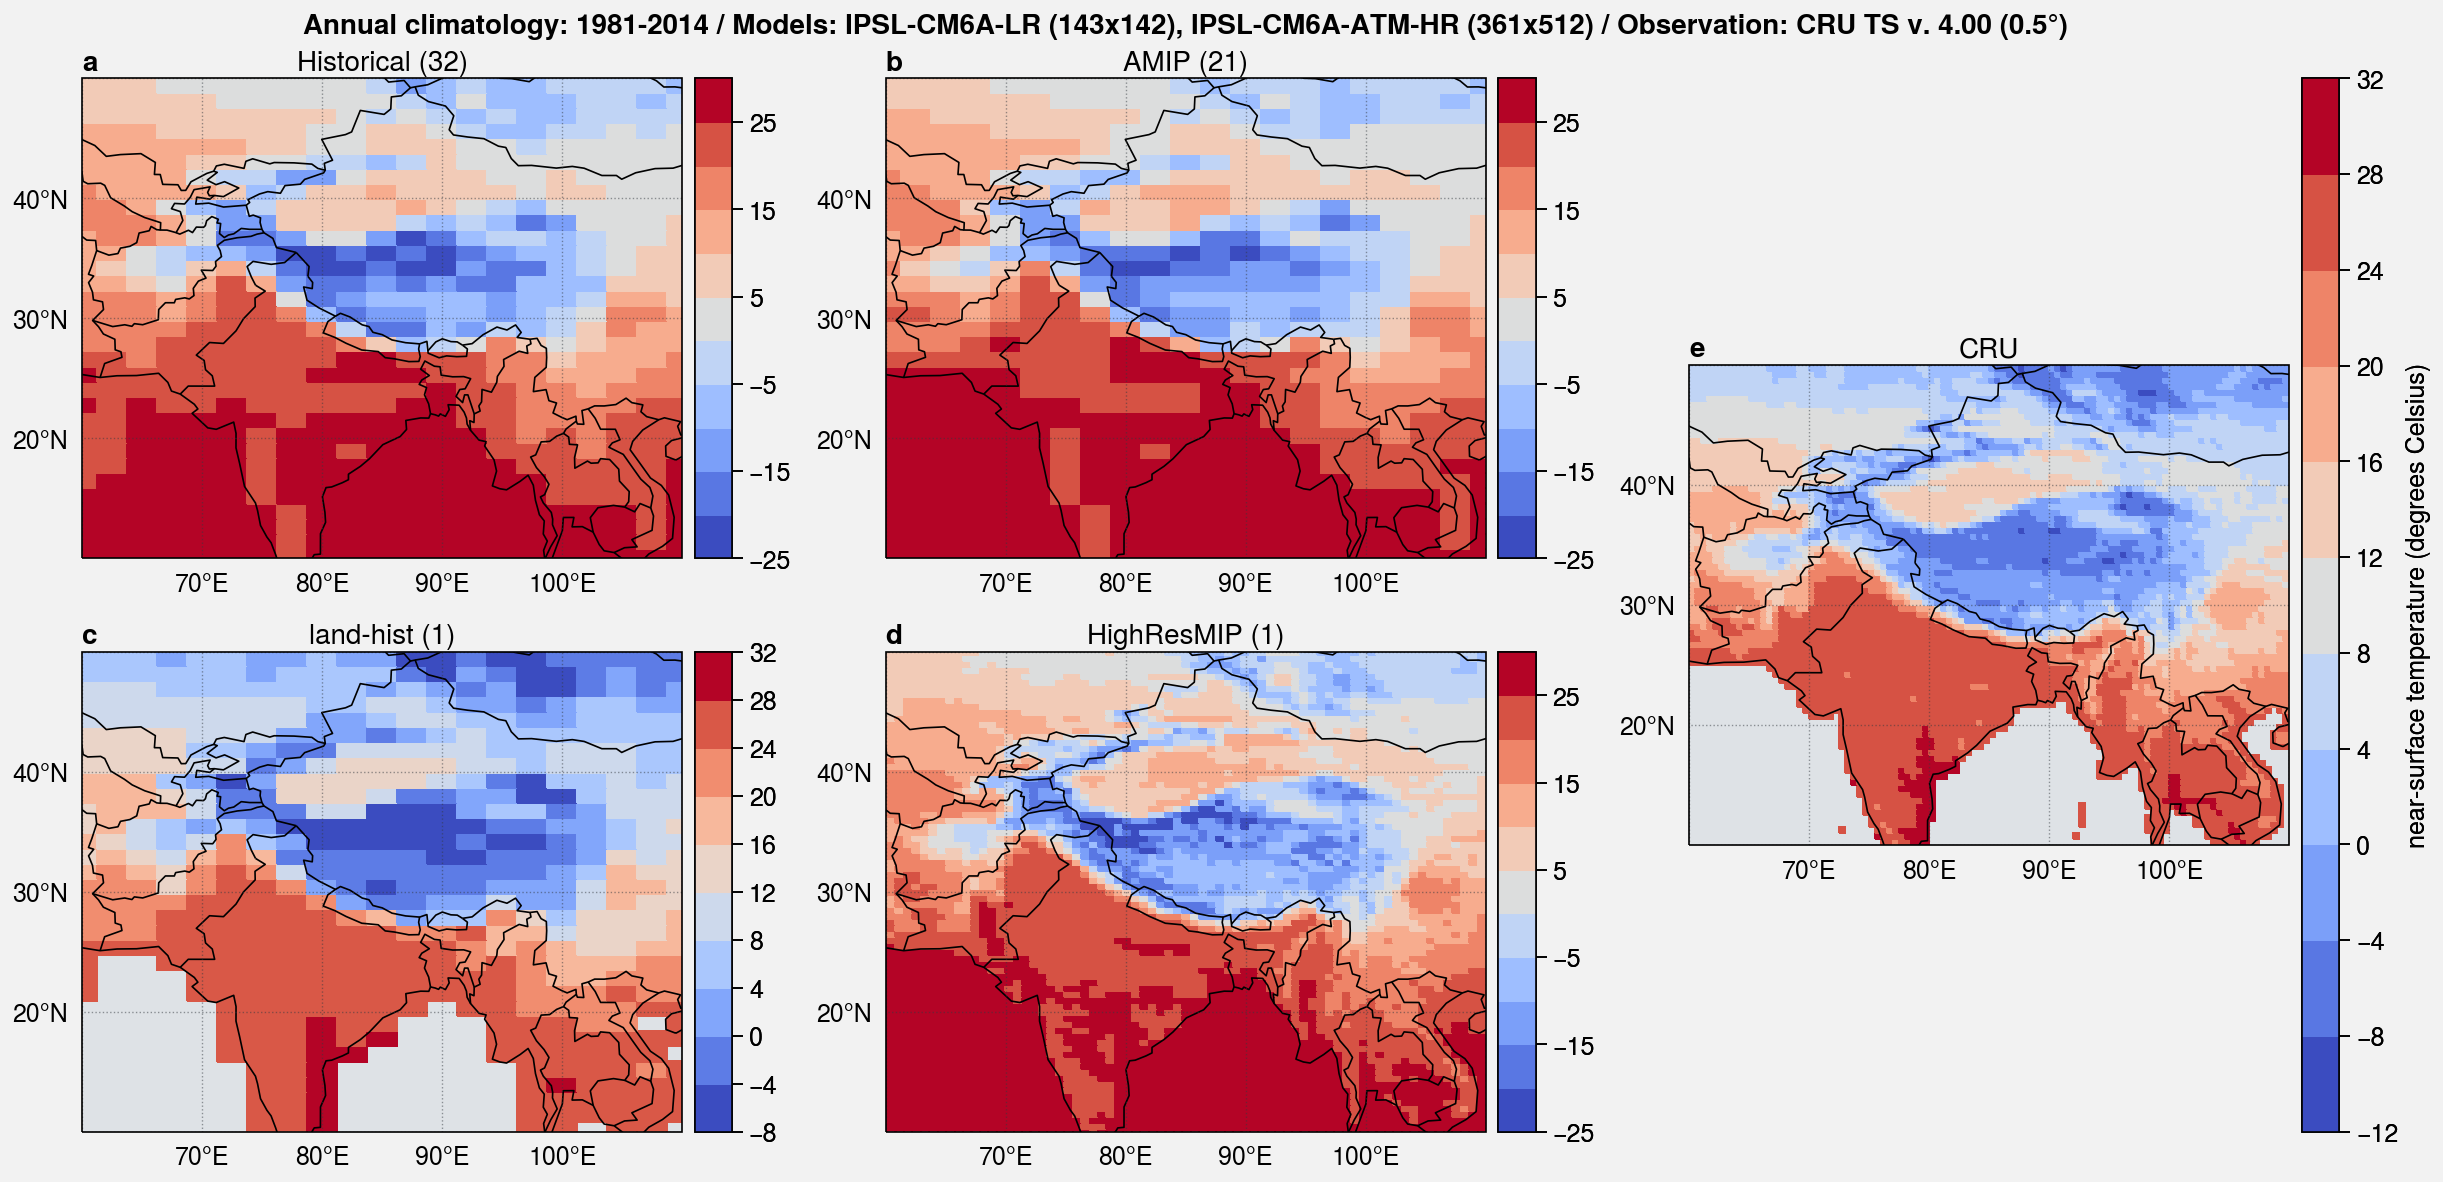

In [37]:
#Check colorbars 

f, axs = plot.subplots([[1, 2, 5], [3, 4, 5]], proj='cyl', share=3, axwidth=3)

cmap='CoolWarm'

for i, ax in enumerate(axs):
    if i < 3:
        m = ax.pcolormesh(concat.isel(exp=i), cmap=cmap, colorbar='r')
        ax.format(title=str(concat.isel(exp=i).exp.values))
    
axs[3].pcolormesh(da_HR_clim, cmap=cmap, colorbar='r')
axs[3].format(title='HighResMIP (1)') 

axs[4].pcolormesh(obs_clim, cmap=cmap, colorbar='r')
axs[4].format(title='CRU')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle="Annual climatology: 1981-2014 / Models: IPSL-CM6A-LR (143x142), IPSL-CM6A-ATM-HR (361x512) / Observation: CRU TS v. 4.00 (0.5°)",
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

In [38]:
concat.max()

<xarray.DataArray ()>
array(29.30740472)
Coordinates:
    height   float64 2.0

In [40]:
obs_clim.max()

<xarray.DataArray ()>
array(29.5801744)

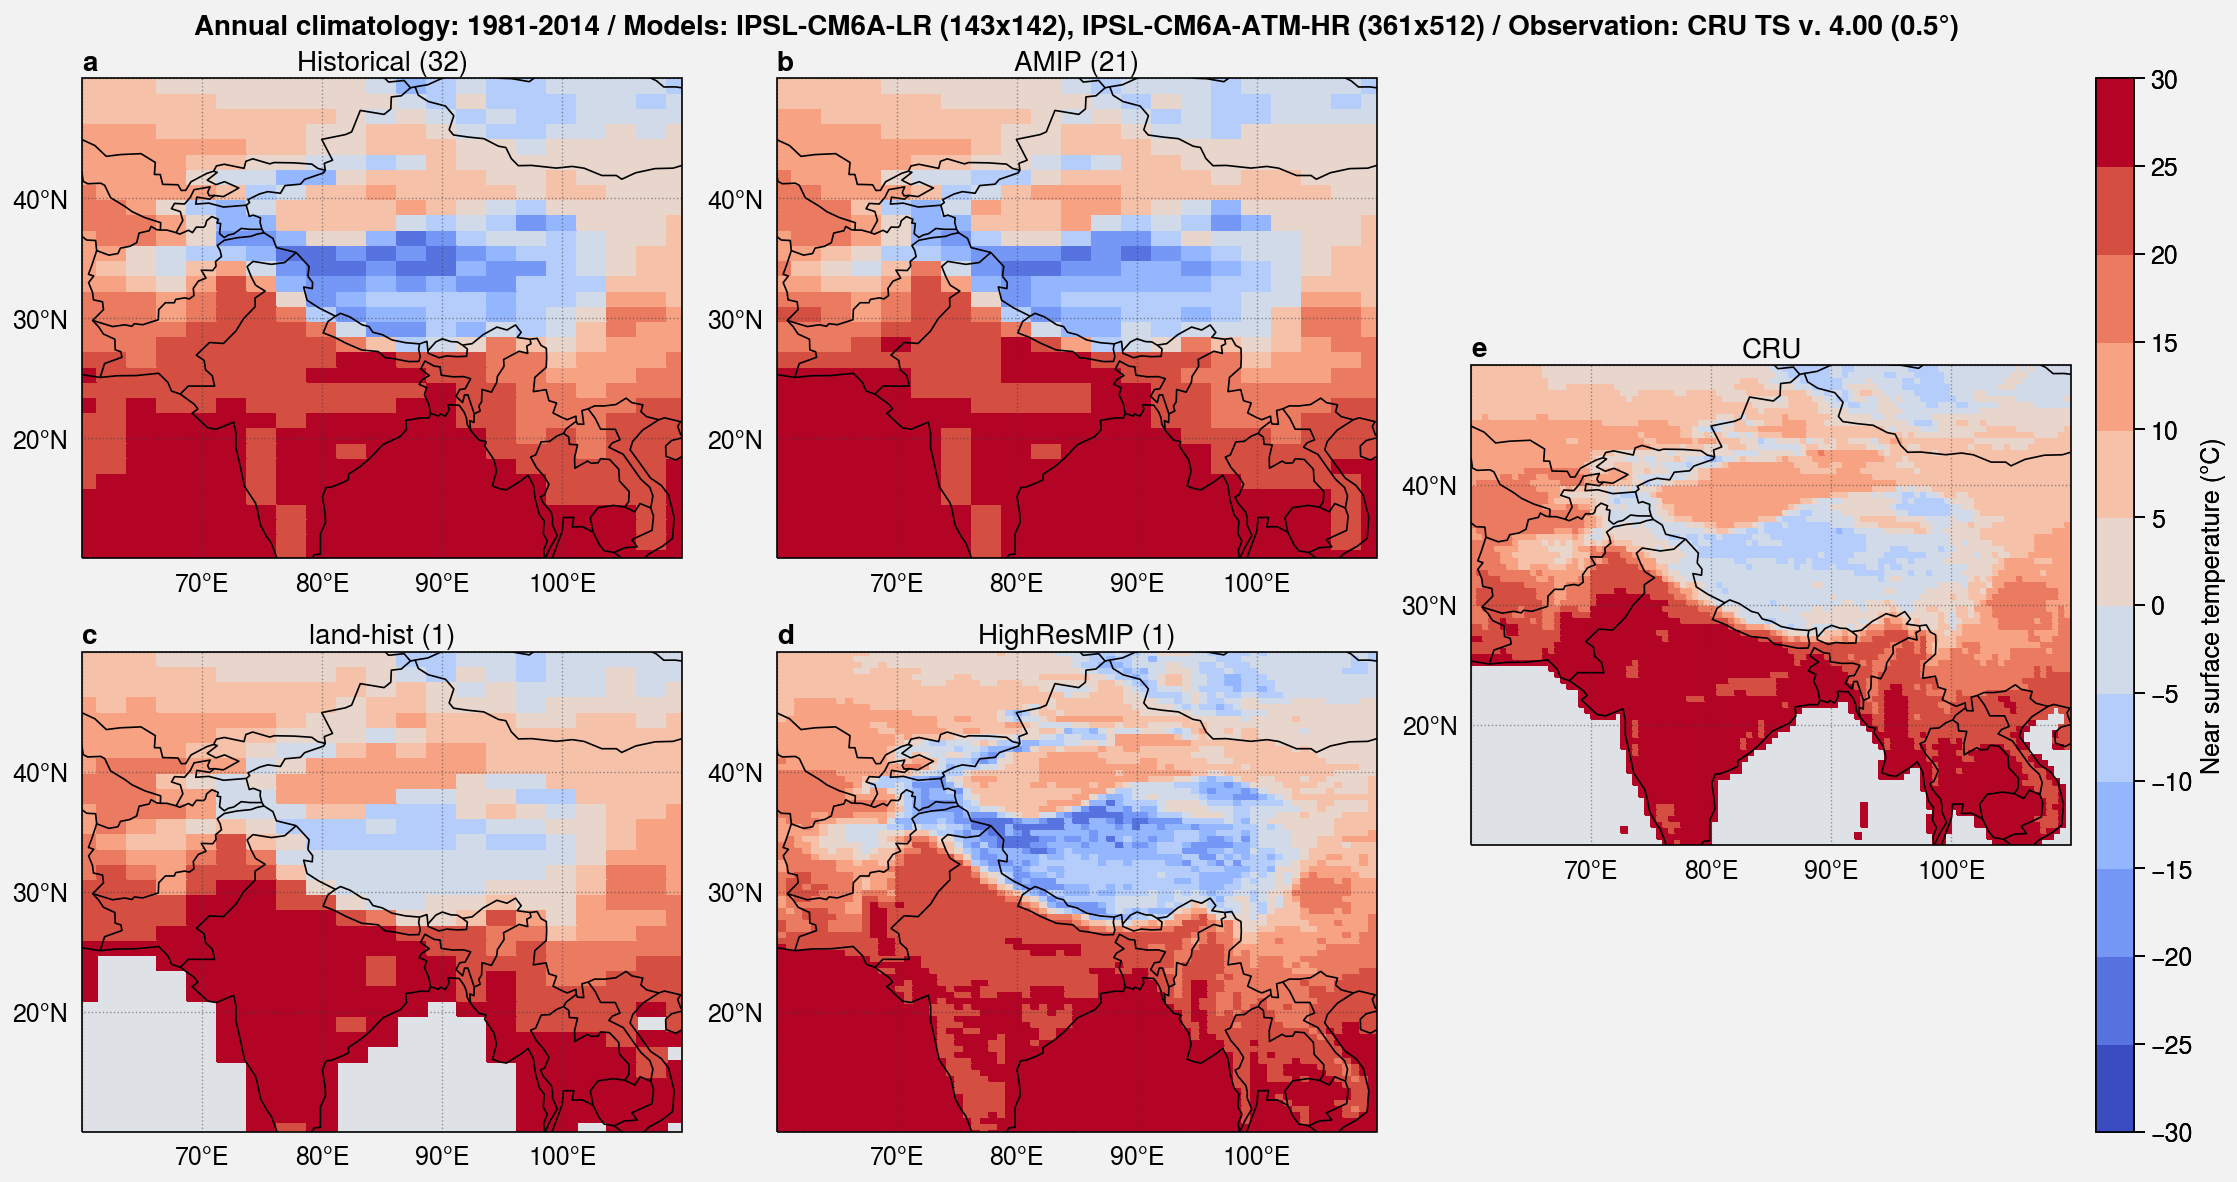

In [42]:
# Final plot

f, axs = plot.subplots([[1, 2, 5], [3, 4, 5]], proj='cyl', share=3, axwidth=3)

cmap='CoolWarm'
levels=plot.arange(-30,30,5)
extend='neither'

for i, ax in enumerate(axs):
    if i < 3:
        m = ax.pcolormesh(concat.isel(exp=i), cmap=cmap, levels=levels,
                          extend=extend,
                          norm='midpoint'
                         )
        ax.format(title=str(concat.isel(exp=i).exp.values))
    
axs[3].pcolormesh(da_HR_clim, cmap=cmap, levels=levels,
                  extend=extend,
                  norm='midpoint'
                 )
axs[3].format(title='HighResMIP (1)') 

axs[4].pcolormesh(obs_clim, cmap=cmap, levels=levels,
                  extend=extend,
                  norm='midpoint'
                 )
axs[4].format(title='CRU') 

f.colorbar(m, label='Near surface temperature (°C)')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle="Annual climatology: 1981-2014 / Models: IPSL-CM6A-LR (143x142), IPSL-CM6A-ATM-HR (361x512) / Observation: CRU TS v. 4.00 (0.5°)",
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

# f.save('img/temp/annual_clim_tas_IPSL_CMIP6.png')

# Bias

In [12]:
bias = xr.concat(
    [
        (da_historical_clim-obs_regrid_clim),
        (da_amip_clim-obs_regrid_clim),
        (da_land_hist_clim-obs_regrid_clim),
        (da_HR_regrid_clim-obs_regrid_clim)
    ],
    pd.Index(
        [
            'Historical (32) - CRU',
            'AMIP (21) - CRU',
            'land-hist (1) - CRU',
            'HighResMIP (1) - CRU'
        ], 
        name='bias'
    )
)

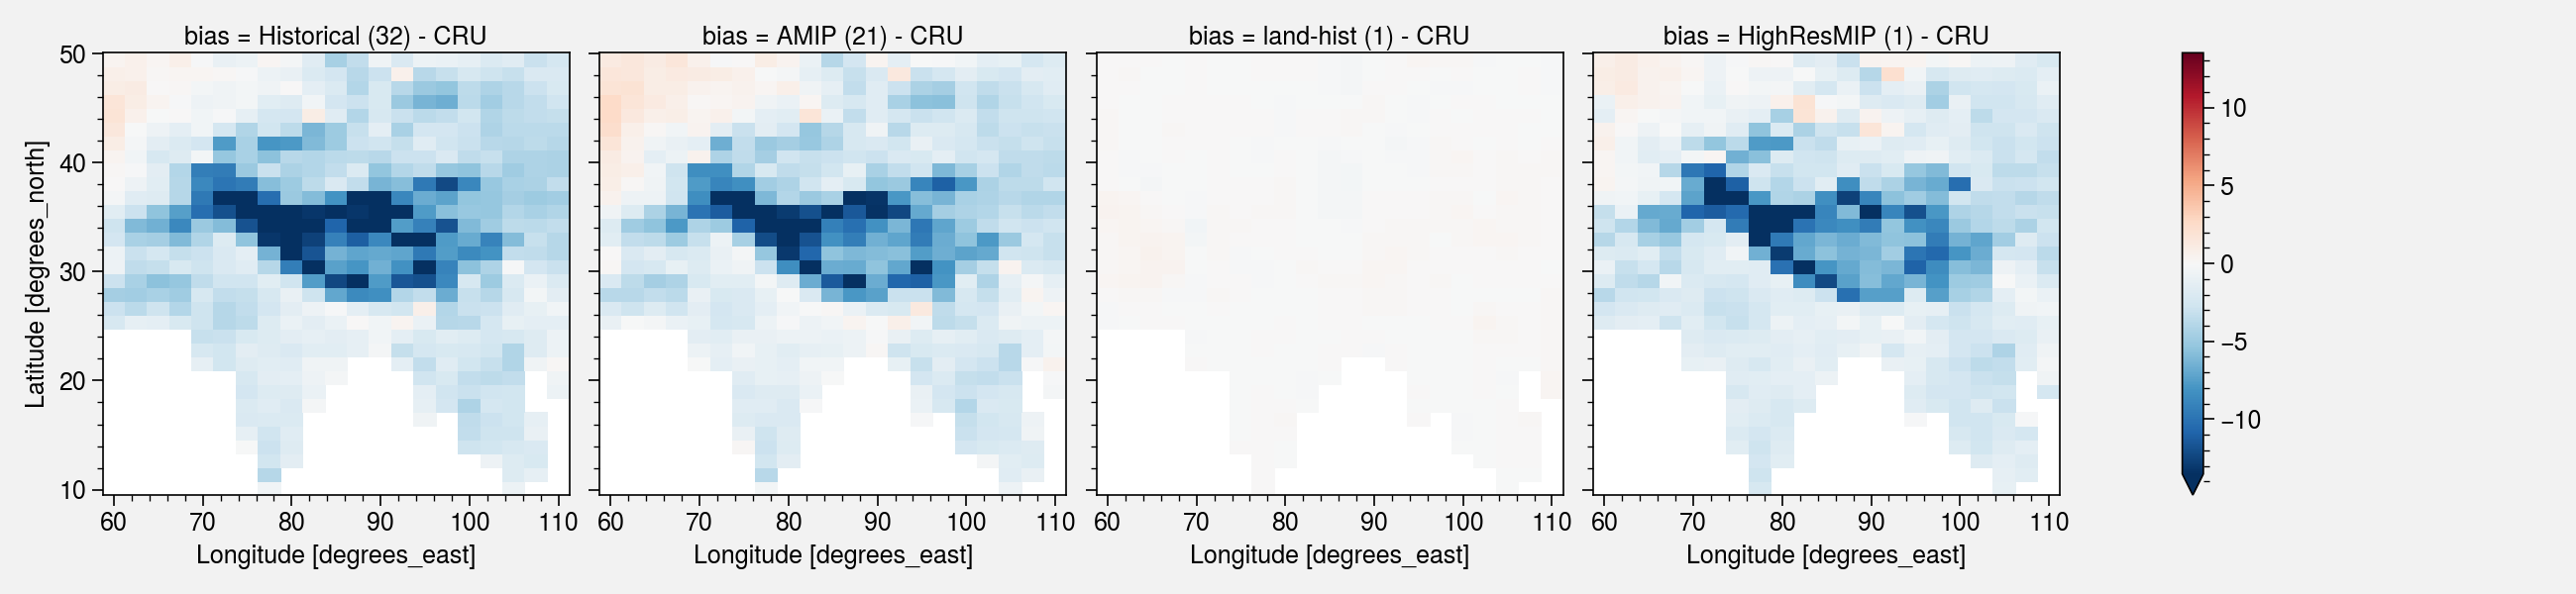

In [13]:
bias.plot(col='bias', robust=True)

In [14]:
bias.min()

<xarray.DataArray ()>
array(-18.31718682)
Coordinates:
    height   float64 2.0

In [15]:
bias.max()

<xarray.DataArray ()>
array(2.60153754)
Coordinates:
    height   float64 2.0

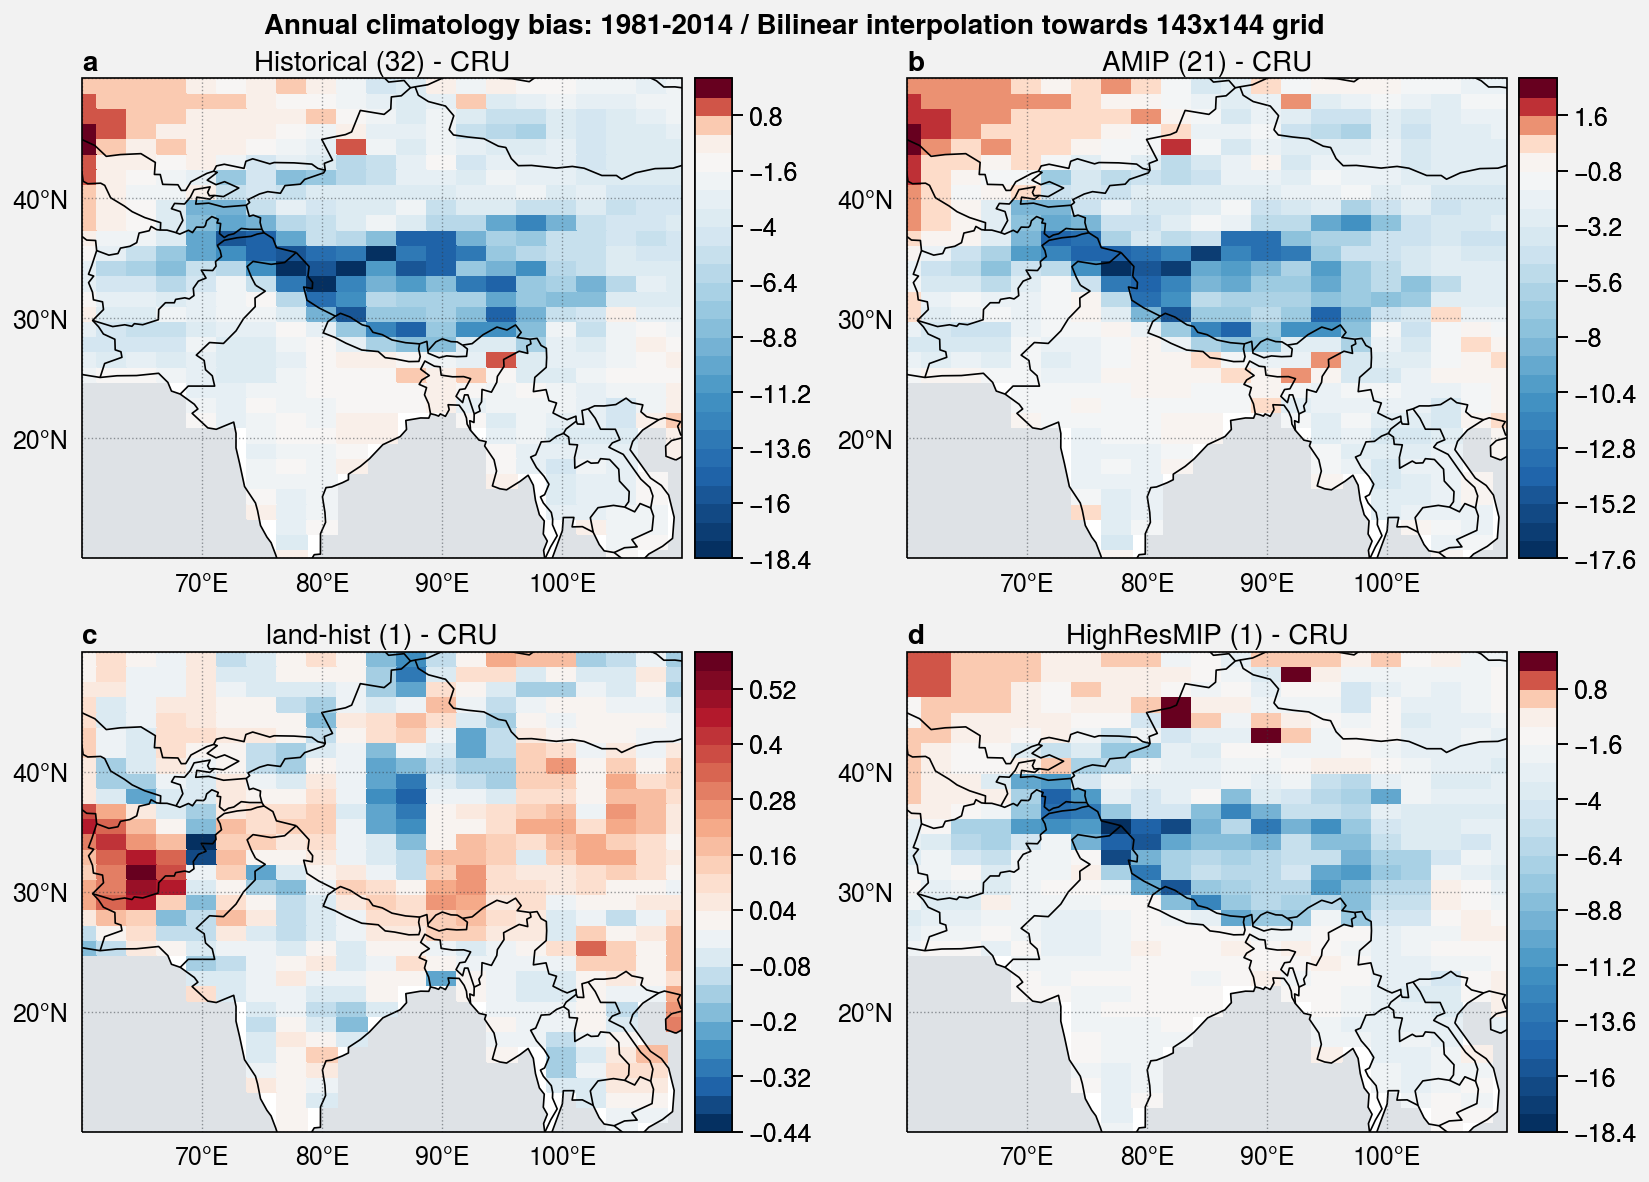

In [17]:
# Check colorbars extent

f, axs = plot.subplots(proj='cyl', ncols=2, nrows=2, share=3, axwidth=3)

for i, ax in enumerate(axs):
    m = ax.pcolormesh(
        bias.isel(bias=i), 
        cmap='BuRd',
        colorbar='r',
        norm='midpoint',
        levels=30
    )
    ax.format(title=str(bias.isel(bias=i).bias.values))

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle="Annual climatology bias: 1981-2014 / Bilinear interpolation towards 143x144 grid",
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

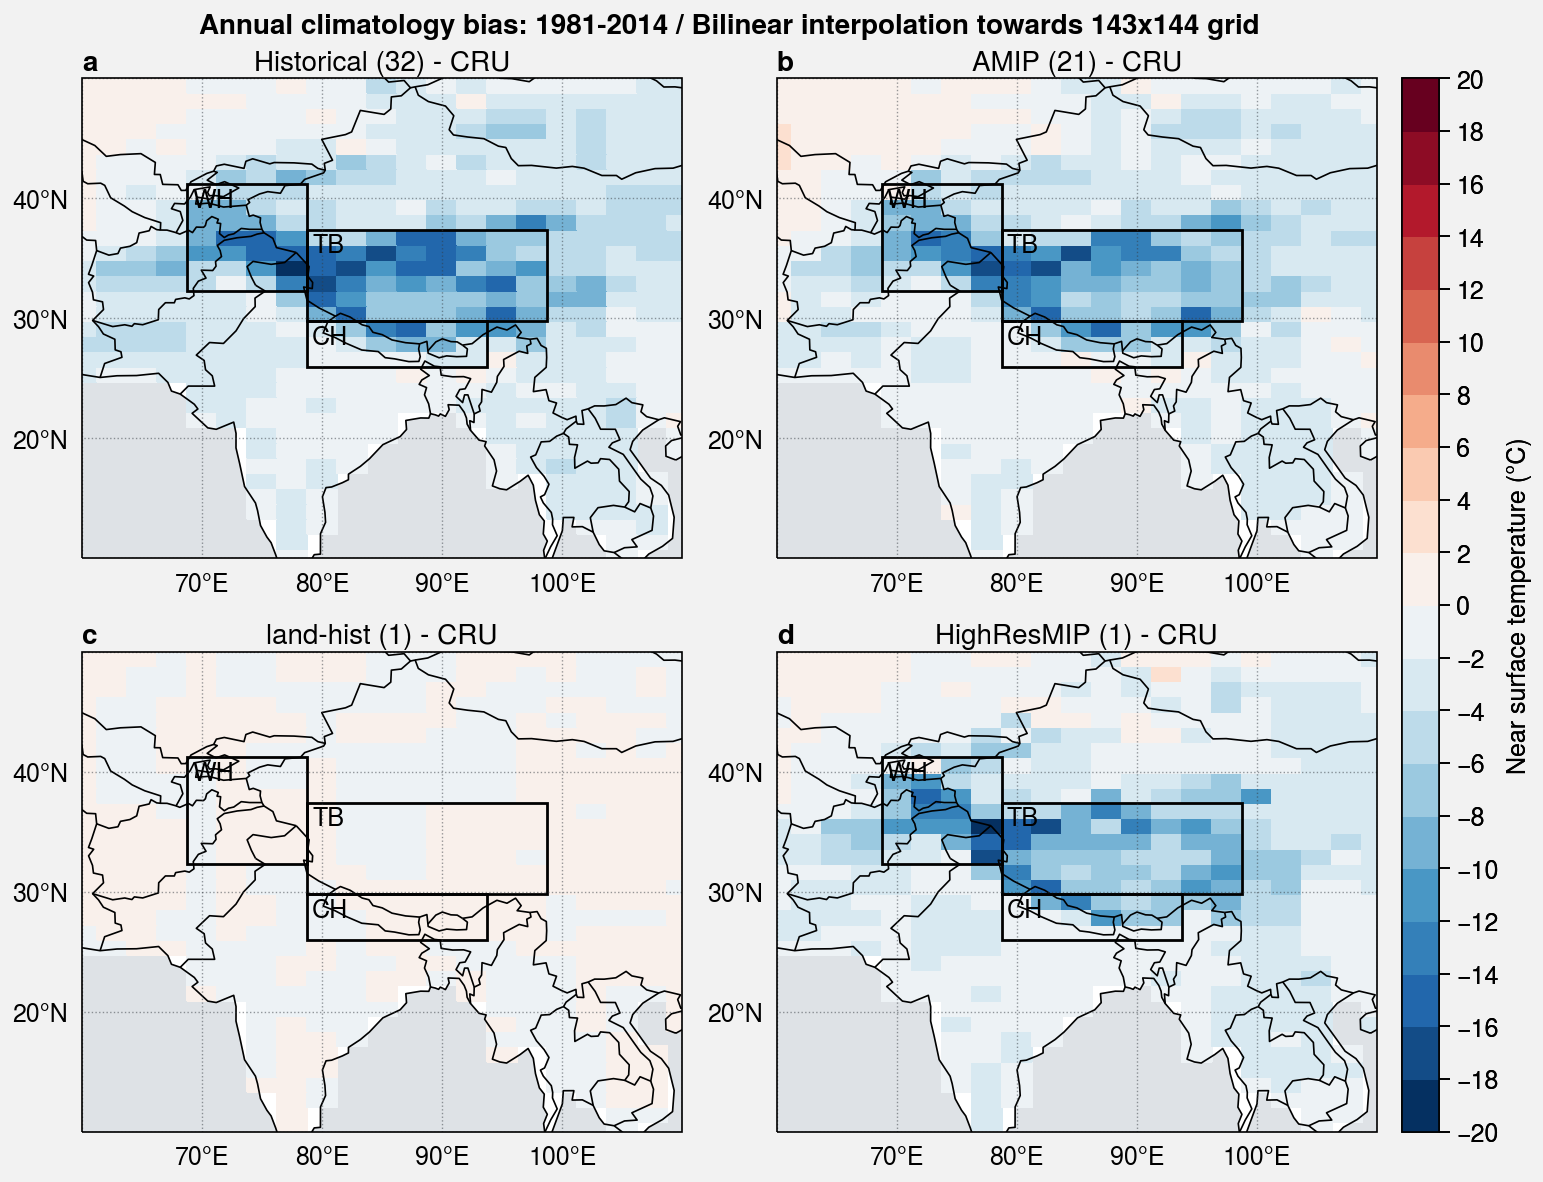

In [43]:
# Final plot

f, axs = plot.subplots(proj='cyl', ncols=2, nrows=2, share=3, axwidth=3)

for i, ax in enumerate(axs):
    m = ax.pcolormesh(
        bias.isel(bias=i), 
        cmap='RdBu_r', 
        levels=plot.arange(-20,20,2), 
#         extend='both',
#         norm='midpoint'
    )
    ax.format(title=str(bias.isel(bias=i).bias.values))

f.colorbar(m, label='Near surface temperature (°C)')

dx=2.5
dy=1.2676
for ax in axs:
    ax.text(70-dx/3, 31.690142-dy/2+dy+7.6056339-dy/2, 'WH')
    ax.add_patch(mpatches.Rectangle(
            xy=[70-dx/2, 31.690142-dy/2+dy], width=10, height=7.6056339+dy,
            transform=ccrs.PlateCarree(), fill=False
        ))
    ax.text(77.5+dx-dx/3, 26.619719-dy/2+3.802816-dy-dy/2, 'CH')
    ax.add_patch(mpatches.Rectangle(
            xy=[77.5-dx/2+dx, 26.619719-dy/2], width=15, height=3.802816,
            transform=ccrs.PlateCarree(), fill=False
        )) # CH
    ax.text(82.5-dx-dx/3, 31.690142-dy/2-dy+7.6056339-dy-dy/2, 'TB')
    ax.add_patch(mpatches.Rectangle(
            xy=[82.5-dx/2-dx, 31.690142-dy/2-dy], width=15+2*dx, height=7.6056339,
            transform=ccrs.PlateCarree(), fill=False
        )) # TP

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', borders=True,
    suptitle="Annual climatology bias: 1981-2014 / Bilinear interpolation towards 143x144 grid",
    lonlines=10, latlines=10, abc=True, latlim=latlim, lonlim=lonlim
)

# f.save('img/temp/tas_IPSL_CMIP6_bias.png')

# Annual cycle on the different zones

In [52]:
# Old single zone
# lonlim_zone=(78,78+20)
# latlim_zone=(27,27+11)

dx=2.5
dy=1.2676

lonlim_WH=(70-dx/2,70-dx/2+10)
latlim_WH=(31.690142-dy/2+dy,31.690142-dy/2+dy+7.6056339+dy)

lonlim_CH=(77.5-dx/2+dx,77.5-dx/2+dx+15)
latlim_CH=(26.619719-dy/2,26.619719-dy/2+3.802816)

lonlim_TB=(82.5-dx/2-dx,82.5-dx/2-dx+15+2*dx)
latlim_TB=(31.690142-dy/2-dy,31.690142-dy/2-dy+7.6056339)

## Charger tout comme ça on fait les cycles annules + time series avec le shading sur les 3 zones à la volé

In [117]:
realization = '*'
da_historical_ens = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/historical/'+realization+'/'+table+'/'+var+'/gr/latest/*.nc', 
    combine='nested', concat_dim='realization', parallel=True
).sel(time=period, lon=slice(lonlim[0],lonlim[1]), lat=slice(latlim[0],latlim[1]))[var].load()

da_amip_ens = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/amip/'+realization+'/'+table+'/'+var+'/gr/latest/*-201412.nc', 
    combine='nested', concat_dim='realization', parallel=True
).sel(time=period, lon=slice(lonlim[0],lonlim[1]), lat=slice(latlim[0],latlim[1]))[var].load()

In [121]:
zone_slices = [
    [slice(lonlim_WH[0],lonlim_WH[1]), slice(latlim_WH[0],latlim_WH[1])],
    [slice(lonlim_CH[0],lonlim_CH[1]), slice(latlim_CH[0],latlim_CH[1])],
    [slice(lonlim_TB[0],lonlim_TB[1]), slice(latlim_TB[0],latlim_TB[1])]
]

In [126]:
zone_slices[0][0]

slice(68.75, 78.75, None)

In [56]:
# Compute annual cycles on the zone

zone_slices = [
    [slice(lonlim_WH[0],lonlim_WH[1]), slice(latlim_WH[0],latlim_WH[1])],
    [slice(lonlim_CH[0],lonlim_CH[1]), slice(latlim_CH[0],latlim_CH[1])],
    [slice(lonlim_TB[0],lonlim_TB[1]), slice(latlim_TB[0],latlim_TB[1])]
]

for zone_slice in zone_slices:
    ac_land_hist = u.annual_cycle(u.spatial_average(
        da_land_hist.sel(lon=zone_slice[0][0], lat=zone_slice[0][1])-273.15
    )).load()
    ac_obs_regrid = u.annual_cycle(u.spatial_average(
        obs_regrid.sel(lon=zone_slice[0][0], lat=zone_slice[0][1])
    )).load()
    ac_HR_regrid = u.annual_cycle(u.spatial_average(
        da_HR_regrid.sel(lon=zone_slice[0][0], lat=zone_slice[0][1])-273.15
    )).load()

In [56]:
# Compute annual cycles on the zone
ac_historical = u.annual_cycle(u.spatial_average(
    da_historical.sel(lon=slice(lonlim_TB[0],lonlim_TB[1]), lat=slice(latlim_TB[0],latlim_TB[1]))-273.15
)).load()
ac_amip = u.annual_cycle(u.spatial_average(
    da_amip.sel(lon=slice(lonlim_TB[0],lonlim_TB[1]), lat=slice(latlim_TB[0],latlim_TB[1]))-273.15
)).load()


ac_land_hist = u.annual_cycle(u.spatial_average(
    da_land_hist.sel(lon=slice(lonlim_TB[0],lonlim_TB[1]), lat=slice(latlim_TB[0],latlim_TB[1]))-273.15
)).load()
ac_obs_regrid = u.annual_cycle(u.spatial_average(
    obs_regrid.sel(lon=slice(lonlim_TB[0],lonlim_TB[1]), lat=slice(latlim_TB[0],latlim_TB[1]))
)).load()
ac_HR_regrid = u.annual_cycle(u.spatial_average(
    da_HR_regrid.sel(lon=slice(lonlim_TB[0],lonlim_TB[1]), lat=slice(latlim_TB[0],latlim_TB[1]))-273.15
)).load()

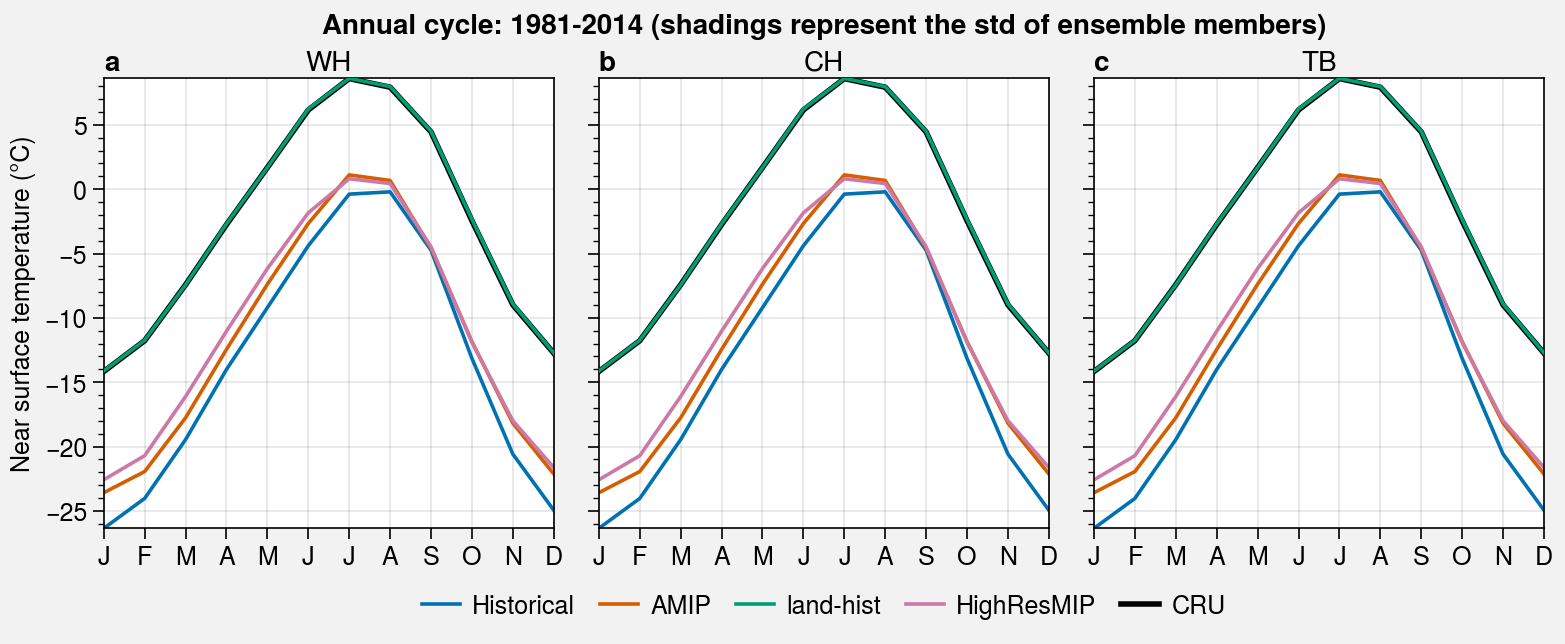

In [115]:
f, axs = plot.subplots(ncols=3, nrows=1)

titles = ['WH', 'CH', 'TB']

for i, ax in enumerate(axs):
    h1 = ac_historical.plot(ax=ax, label='Historical')
    h2 = ac_amip.plot(ax=ax, label='AMIP')
    h3 = ac_land_hist.plot(ax=ax, label='land-hist', zorder=10)
    h4 = ac_HR_regrid.plot(ax=ax, label='HighResMIP')
    h5 = ac_obs_regrid.plot(ax=ax, label='CRU', color='black', linewidth=2)
    ax.format(title=titles[i])
    
    hs = [h1, h2, h3, h4, h5]

axs.format(
    xlocator='index', xformatter=['J','F','M','A','M','J','J','A','S','O','N','D'], xtickminor=False,
    xlabel='', ylabel='Near surface temperature (°C)',
    suptitle='Annual cycle: 1981-2014 (shadings represent the std of ensemble members)', abc=True
)
    
f.legend(hs, loc='b', ncols=5, order='F', center=False, frame=False)

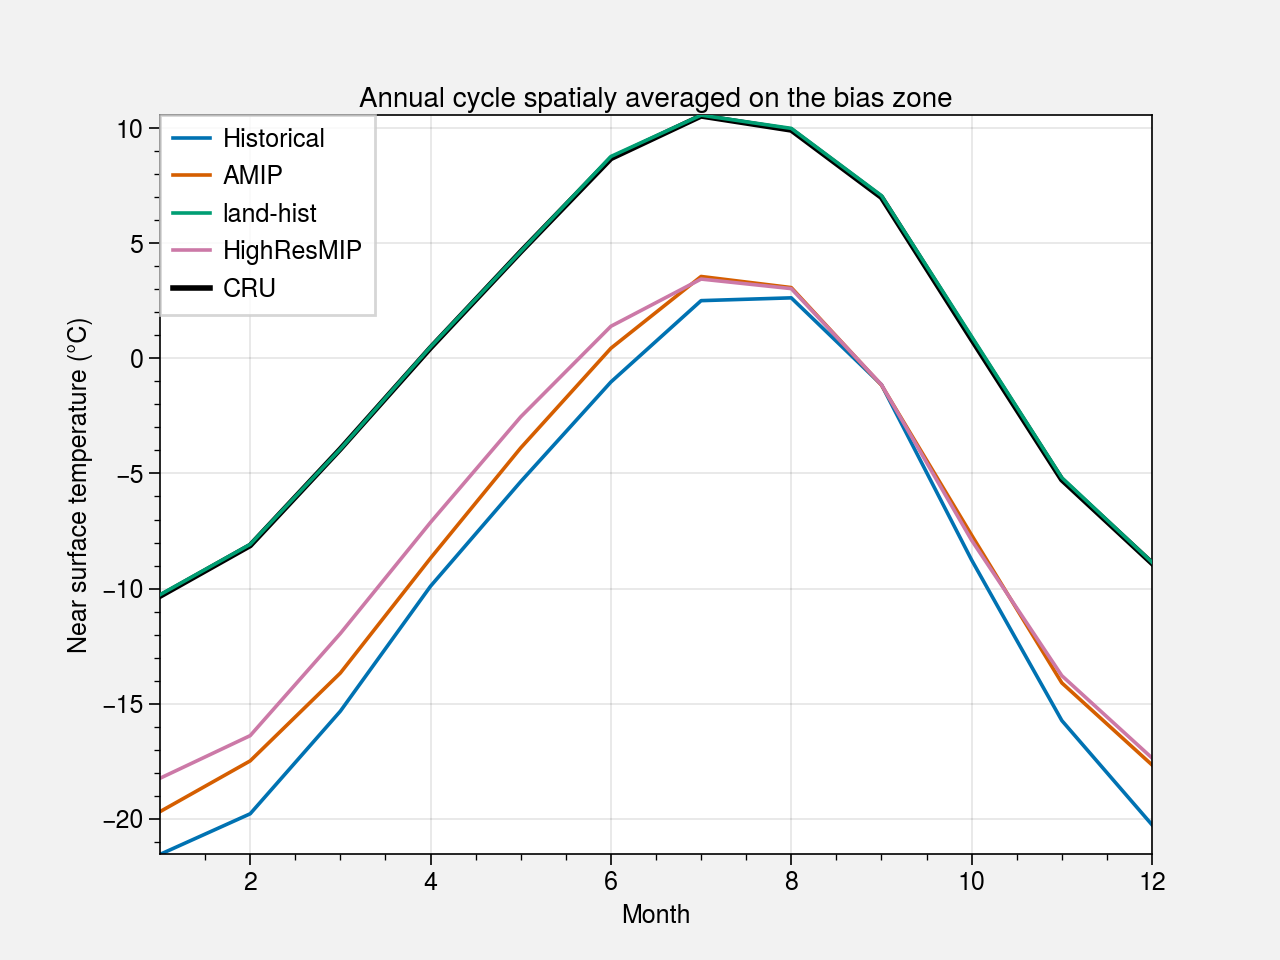

In [96]:
plt.figure()

ac_historical.plot(label='Historical')
ac_amip.plot(label='AMIP')
ac_land_hist.plot(label='land-hist', zorder=10)
ac_HR_regrid.plot(label='HighResMIP')

ac_obs_regrid.plot(label='CRU', color='black', linewidth=2)

plt.title('Annual cycle spatialy averaged on the bias zone')
# plt.ylim(0,100)
plt.ylabel('Near surface temperature (°C)')
plt.xlabel('Month')
plt.legend()

plt.savefig('img/ac_tas_IPSL_CMIP6.png')

# Check ensemble dispersion for historical

In [97]:
da_historical_ens = xr.open_mfdataset(
    '/bdd/CMIP6/CMIP/'+institute+'/'+model+'/historical/*/'+table+'/'+var+'/gr/latest/*.nc', combine='nested', concat_dim='realization', parallel=True
).sel(time=period, lon=slice(lonlim_zone[0],lonlim_zone[1]), lat=slice(latlim_zone[0],latlim_zone[1]))[var]
da_historical_ens

<xarray.DataArray 'tas' (realization: 32, time: 408, lat: 8, lon: 8)>
dask.array<getitem, shape=(32, 408, 8, 8), dtype=float32, chunksize=(1, 408, 8, 8), chunktype=numpy.ndarray>
Coordinates:
    height   float64 2.0
  * lon      (lon) float32 80.0 82.5 85.0 87.5 90.0 92.5 95.0 97.5
  * time     (time) datetime64[ns] 1981-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float32 27.887323 29.15493 30.422535 ... 35.492958 36.760563
Dimensions without coordinates: realization
Attributes:
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       air_temperature
    long_name:           Near-Surface Air Temperature
    history:             none
    units:               K
    cell_measures:       area: areacella

In [98]:
ac_historical_ens = u.annual_cycle(u.spatial_average(da_historical_ens)).load()

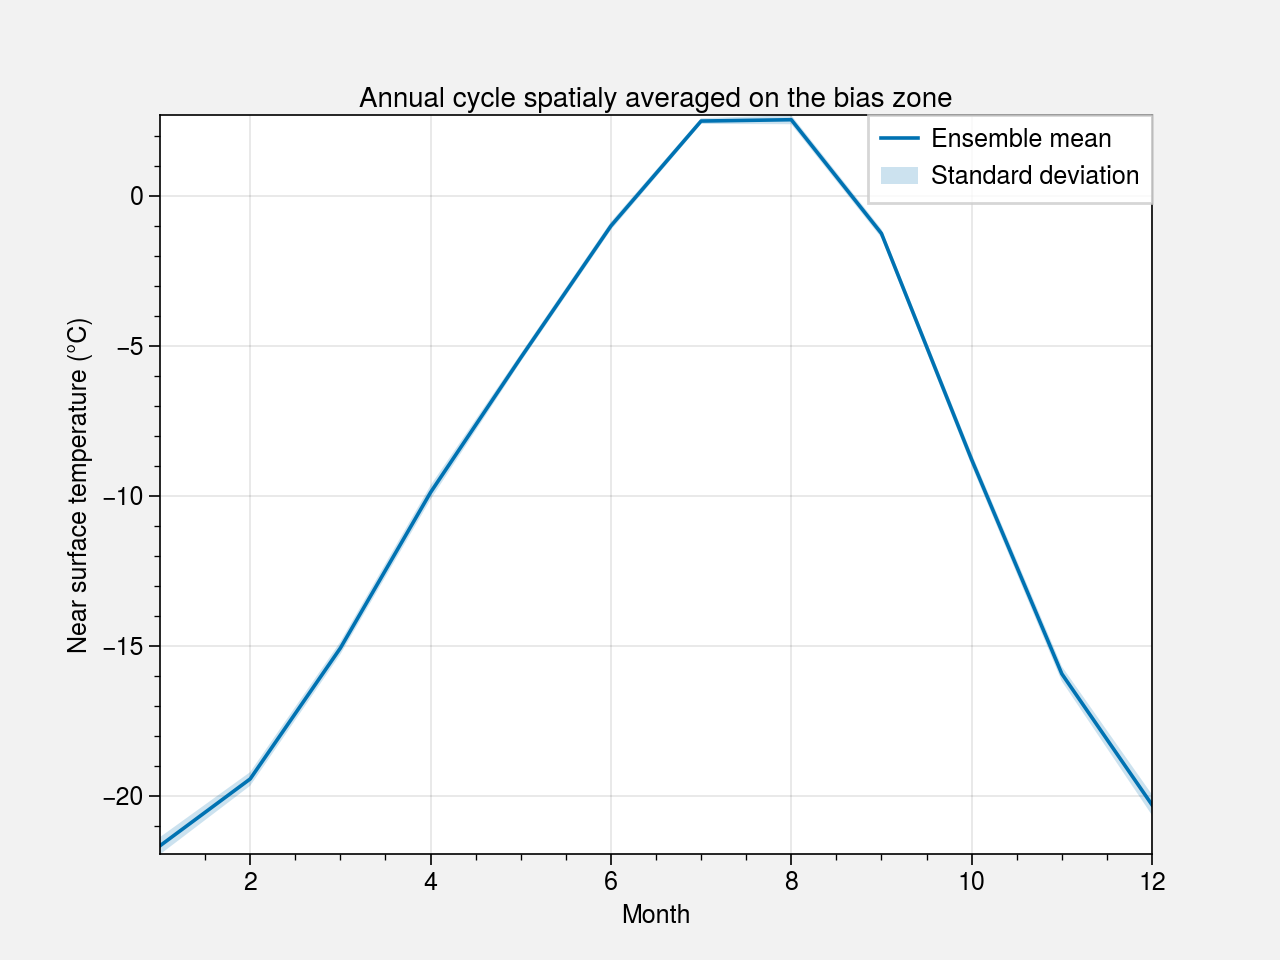

In [100]:
x = ac_historical_ens.month
y = (ac_historical_ens-273.15).mean('realization')
std = (ac_historical_ens-273.15).std('realization')

fig, ax = plt.subplots()

y.plot(ax=ax, label='Ensemble mean')
ax.fill_between(x, y-std, y+std, alpha=0.2, label='Standard deviation')

plt.title('Annual cycle spatialy averaged on the bias zone')
# plt.ylim(0,100)
plt.ylabel('Near surface temperature (°C)')
plt.xlabel('Month')
plt.legend()

plt.savefig('img/ac_tas_IPSL_CMIP6_ens.png')

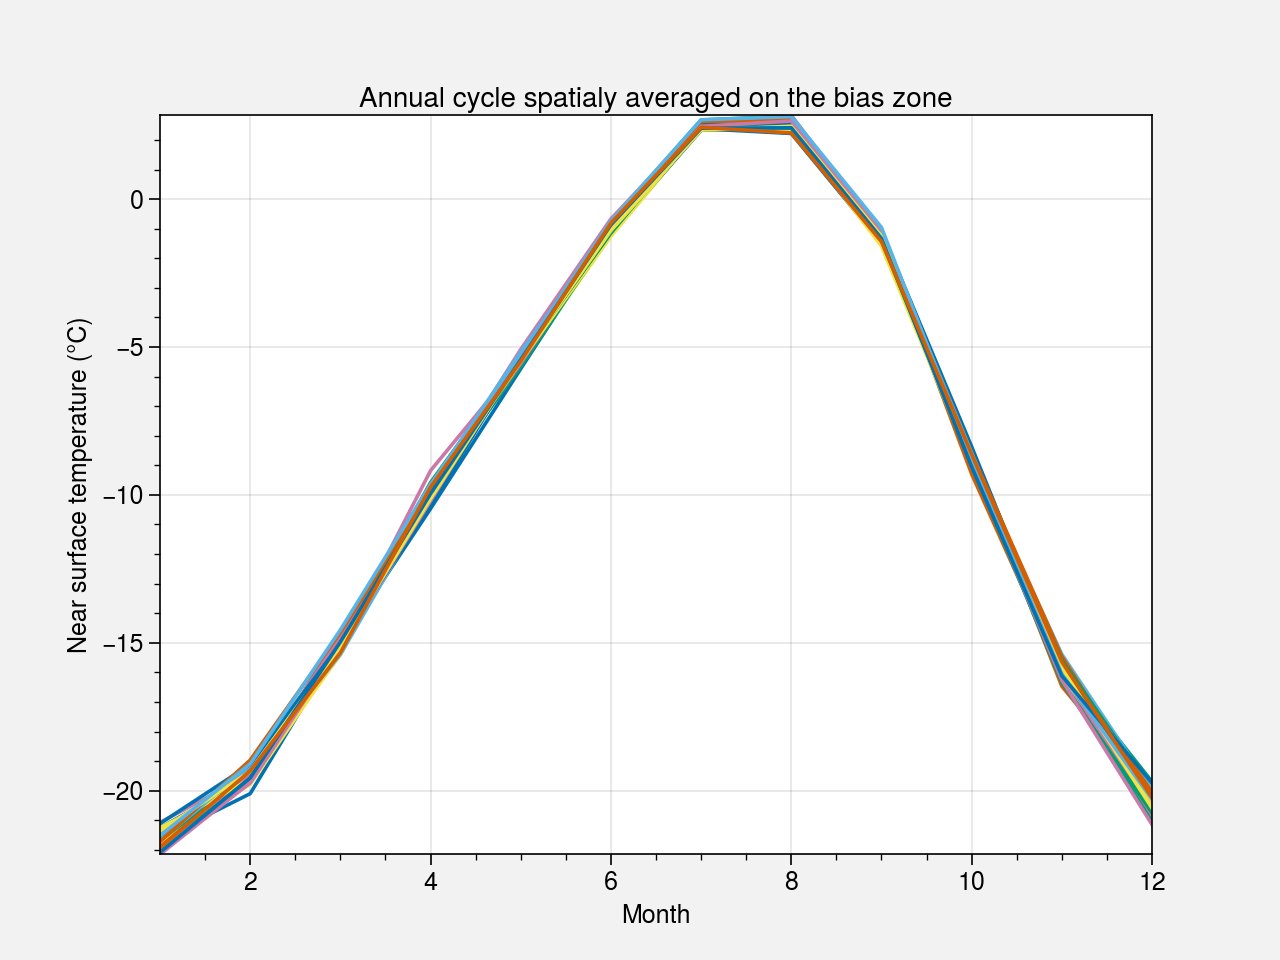

In [101]:
fig, ax = plt.subplots()

for i in ac_historical_ens.realization.values:
    (ac_historical_ens[i]-273.15).plot(ax=ax)

plt.title('Annual cycle spatialy averaged on the bias zone')
# plt.ylim(0,100)
plt.ylabel('Near surface temperature (°C)')
plt.xlabel('Month')
# plt.legend()

plt.savefig('img/ac_tas_IPSL_CMIP6_ens_full.png')

# Link with orography?

In [66]:
orog = xr.open_dataarray(
    '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r1i1p1f1/fx/orog/gr/latest/orog_fx_IPSL-CM6A-LR_historical_r1i1p1f1_gr.nc'
).sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1]))
orog

mean_topo = xr.open_dataarray('mean_topo.nc').sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1]))
std_topo = xr.open_dataarray('std_topo.nc').sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1]))

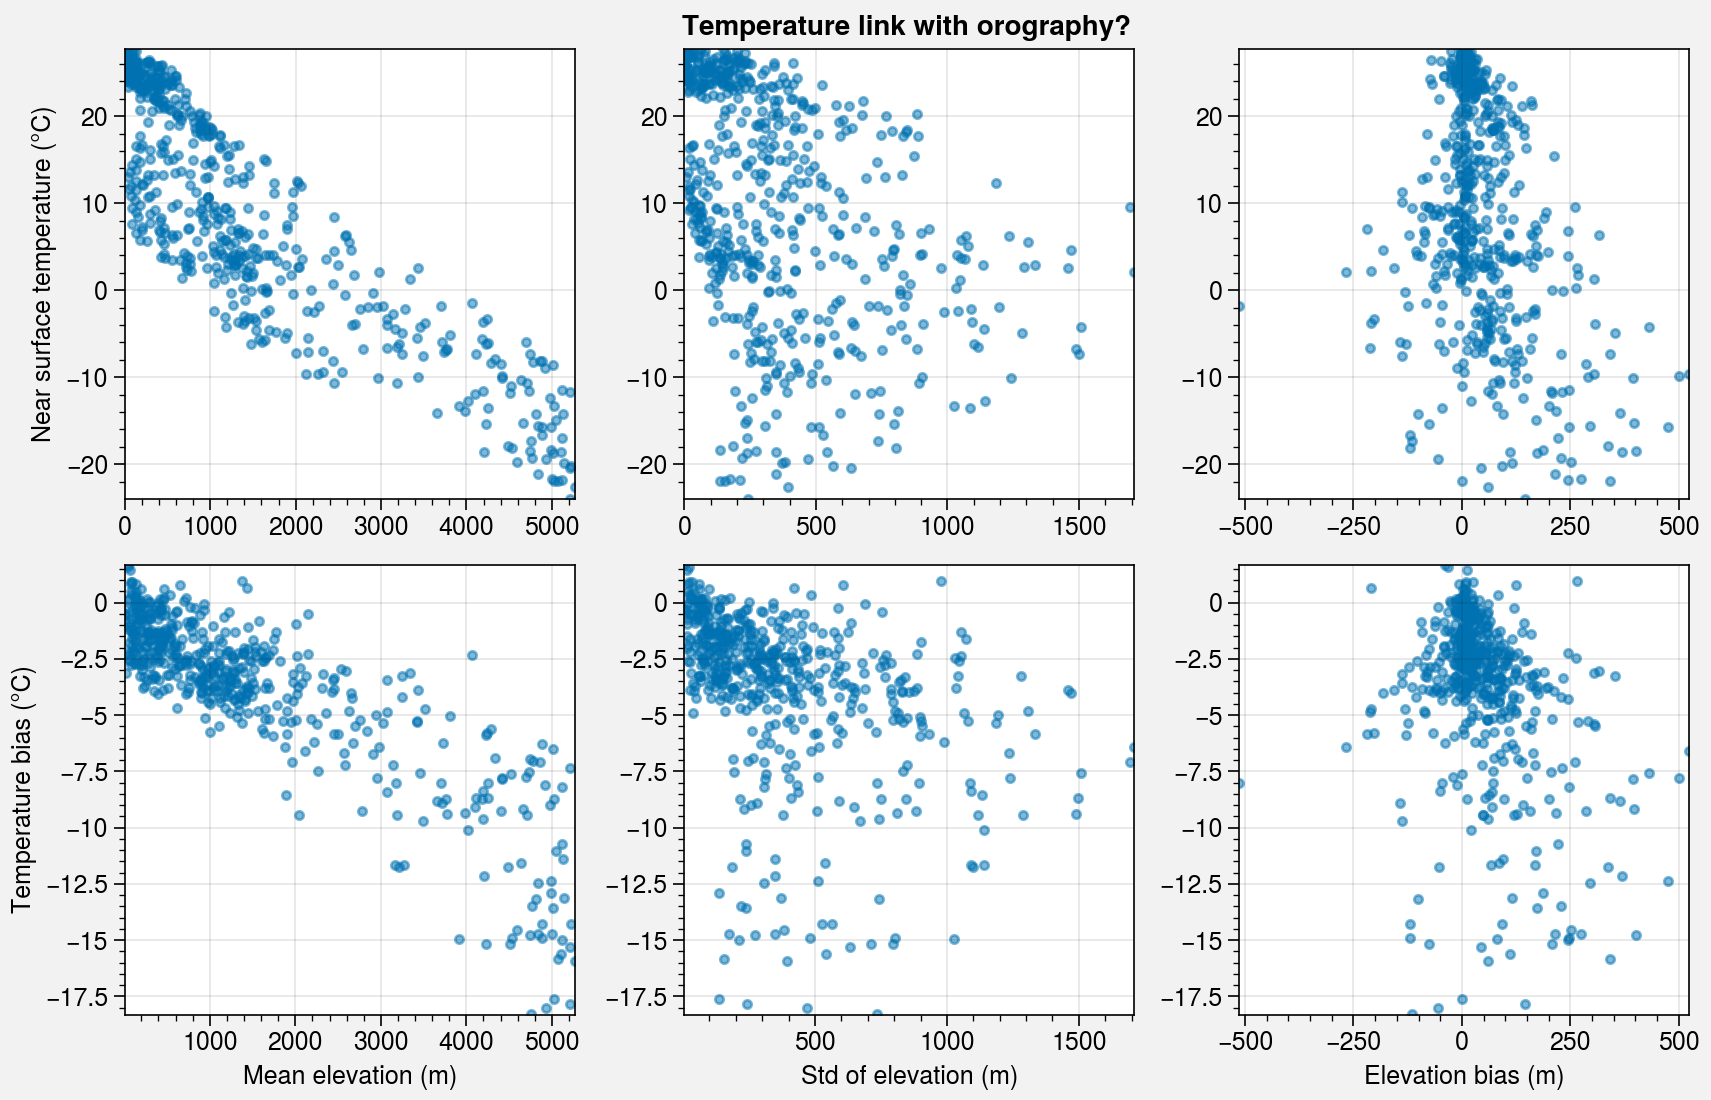

In [93]:
ylabel1='Near surface temperature (°C)'
ylabel2='Temperature bias (°C)'

xlabel1='Mean elevation (m)'
xlabel2='Std of elevation (m)'
xlabel3='Elevation bias (m)'

f, axs = plot.subplots(nrows=2, ncols=3, share=0)

axs[0].scatter(
    mean_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    temp[0].values.flatten(),
    alpha=0.5
)
axs[0].format(ylabel=ylabel1)

axs[1].scatter(
    std_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    temp[0].values.flatten(),
    alpha=0.5
)

axs[2].scatter(
    (orog-mean_topo).sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    temp[0].values.flatten(),
    alpha=0.5
)


axs[3].scatter(
    mean_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    bias[0].values.flatten(),
    alpha=0.5
)
axs[3].format(xlabel=xlabel1, ylabel=ylabel2)

axs[4].scatter(
    std_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    bias[0].values.flatten(),
    alpha=0.5 
)
axs[4].format(xlabel=xlabel2)

axs[5].scatter(
    (orog-mean_topo).sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    bias[0].values.flatten(),
    alpha=0.5
)
axs[5].format(xlabel=xlabel3)

axs.format(suptitle='Temperature link with orography?')

f.save('img/orog_tas.png')

In [1]:
f, axs = plot.subplots()

axs.scatter(
    mean_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    std_topo.sel(lat=slice(latlim[0],latlim[1]), lon=slice(lonlim[0],lonlim[1])).values.flatten(),
    alpha=0.5
)



NameError: name 'plot' is not defined